# Data Mining Final Project

#DETERMINING THE CREDIBILITY OF A GIVEN USER ON YELP PLATFORM.
*Generate a score/probability which tells us how close any*
*given user is to that of an elite user with the help of yelp user data.*

# Section-1: Loading the Data.
Data Source: Yelp Open Dataset https://www.yelp.com/dataset
yelp_academice_dataset_user.json

In [1]:
#Connecting to Drive
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
from sklearn import preprocessing
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_json(r'/content/drive/My Drive/Colab Notebooks/Data_Mining_Project/yelp_academic_dataset_user.json',lines=True)

In [4]:
df.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,ntlvfPzc8eglqvk92iDIAw,Rafael,553,2007-07-06 03:27:11,628,225,227,,"oeMvJh94PiGQnx_6GlndPQ, wm1z1PaJKvHgSDRKfwhfDg...",14,3.57,3,2,1,0,1,11,15,22,22,10,0
1,FOBRPlBHa3WPHFB5qYDlVg,Michelle,564,2008-04-28 01:29:25,790,316,400,"2008,2009,2010,2011,2012,2013","ly7EnE8leJmyqyePVYFlug, pRlR63iDytsnnniPb3AOug...",27,3.84,36,4,5,2,1,33,37,63,63,21,5
2,zZUnPeh2hEp0WydbAZEOOg,Martin,60,2008-08-28 23:40:05,151,125,103,2010,"Uwlk0txjQBPw_JhHsQnyeg, Ybxr1tSCkv3lYA0I1qmnPQ...",5,3.44,9,6,0,1,0,3,7,17,17,4,1
3,QaELAmRcDc5TfJEylaaP8g,John,206,2008-09-20 00:08:14,233,160,84,2009,"iog3Nyg1i4jeumiTVG_BSA, M92xWY2Vr9w0xoH8bPplfQ...",6,3.08,2,1,0,0,0,7,14,7,7,2,0
4,xvu8G900tezTzbbfqmTKvA,Anne,485,2008-08-09 00:30:27,1265,400,512,"2009,2010,2011,2012,2014,2015,2016,2017,2018","3W3ZMSthojCUirKEqAwGNw, eTIbuu23j9tOgmIa9POyLQ...",78,4.37,8,9,2,1,1,22,28,31,31,19,31


#Adding new columns for better insights

In [0]:
#1.Number of years in yelp
df['yelp_years'] = 2020 - pd.DatetimeIndex(df['yelping_since']).year

In [0]:
#2. Is an Elite user or not (Target Variable for training the models)
def ifElite(x):
  if len(x)!=0:
    return 1
  else:
    return 0
df['elite_User'] = df['elite'].apply(ifElite)

In [0]:
#3.Number of Friends
df['number_of_Friends'] = df['friends'].apply(lambda x : len(x))

# Data Exploration

In [8]:
df.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,yelp_years,elite_User,number_of_Friends
0,ntlvfPzc8eglqvk92iDIAw,Rafael,553,2007-07-06 03:27:11,628,225,227,,"oeMvJh94PiGQnx_6GlndPQ, wm1z1PaJKvHgSDRKfwhfDg...",14,3.57,3,2,1,0,1,11,15,22,22,10,0,13,0,1078
1,FOBRPlBHa3WPHFB5qYDlVg,Michelle,564,2008-04-28 01:29:25,790,316,400,"2008,2009,2010,2011,2012,2013","ly7EnE8leJmyqyePVYFlug, pRlR63iDytsnnniPb3AOug...",27,3.84,36,4,5,2,1,33,37,63,63,21,5,12,1,5110
2,zZUnPeh2hEp0WydbAZEOOg,Martin,60,2008-08-28 23:40:05,151,125,103,2010,"Uwlk0txjQBPw_JhHsQnyeg, Ybxr1tSCkv3lYA0I1qmnPQ...",5,3.44,9,6,0,1,0,3,7,17,17,4,1,12,1,838
3,QaELAmRcDc5TfJEylaaP8g,John,206,2008-09-20 00:08:14,233,160,84,2009,"iog3Nyg1i4jeumiTVG_BSA, M92xWY2Vr9w0xoH8bPplfQ...",6,3.08,2,1,0,0,0,7,14,7,7,2,0,12,1,4150
4,xvu8G900tezTzbbfqmTKvA,Anne,485,2008-08-09 00:30:27,1265,400,512,"2009,2010,2011,2012,2014,2015,2016,2017,2018","3W3ZMSthojCUirKEqAwGNw, eTIbuu23j9tOgmIa9POyLQ...",78,4.37,8,9,2,1,1,22,28,31,31,19,31,12,1,21478


In [9]:
df.shape

(1968703, 25)

In [10]:
#Data Types
df.dtypes

user_id                object
name                   object
review_count            int64
yelping_since          object
useful                  int64
funny                   int64
cool                    int64
elite                  object
friends                object
fans                    int64
average_stars         float64
compliment_hot          int64
compliment_more         int64
compliment_profile      int64
compliment_cute         int64
compliment_list         int64
compliment_note         int64
compliment_plain        int64
compliment_cool         int64
compliment_funny        int64
compliment_writer       int64
compliment_photos       int64
yelp_years              int64
elite_User              int64
number_of_Friends       int64
dtype: object

In [11]:
#Null Values
df.isnull().sum()

user_id               0
name                  0
review_count          0
yelping_since         0
useful                0
funny                 0
cool                  0
elite                 0
friends               0
fans                  0
average_stars         0
compliment_hot        0
compliment_more       0
compliment_profile    0
compliment_cute       0
compliment_list       0
compliment_note       0
compliment_plain      0
compliment_cool       0
compliment_funny      0
compliment_writer     0
compliment_photos     0
yelp_years            0
elite_User            0
number_of_Friends     0
dtype: int64

In [12]:
#Description of values of columns
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df.describe()

,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,yelp_years,elite_User,number_of_Friends
count,1968703.00000,1968703.00000,1968703.00000,1968703.00000,1968703.00000,1968703.00000,1968703.00000,1968703.00000,1968703.00000,1968703.00000,1968703.00000,1968703.00000,1968703.00000,1968703.00000,1968703.00000,1968703.00000,1968703.00000,1968703.00000,1968703.00000,1968703.00000
mean,22.16930,39.82709,17.03435,21.70796,1.45882,3.64809,1.98036,0.30042,0.18732,0.16145,0.07019,1.37252,2.84995,2.81917,2.81917,1.05836,1.11474,6.13841,0.03858,1239.45059
std,76.74226,513.35363,355.05685,445.71872,16.67521,1.17253,72.29082,12.75309,15.07502,11.62099,9.96790,58.82533,96.94462,86.51499,86.51499,31.54894,92.26612,2.78672,0.19260,3489.50037
min,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,4.00000
25%,2.00000,0.00000,0.00000,0.00000,0.00000,3.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,4.00000,0.00000,4.00000
50%,5.00000,3.00000,0.00000,0.00000,0.00000,3.88000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,6.00000,0.00000,46.00000
75%,15.00000,13.00000,3.00000,3.00000,0.00000,4.57000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,8.00000,0.00000,1126.00000
max,14455.00000,197130.00000,165861.00000,191359.00000,11568.00000,5.00000,25452.00000,13501.00000,14179.00000,13654.00000,12669.00000,58480.00000,72370.00000,40508.00000,40508.00000,15445.00000,82622.00000,16.00000,1.00000,359878.00000


#Visualizing the above data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f70ea06ffd0>,
      dtype=object)

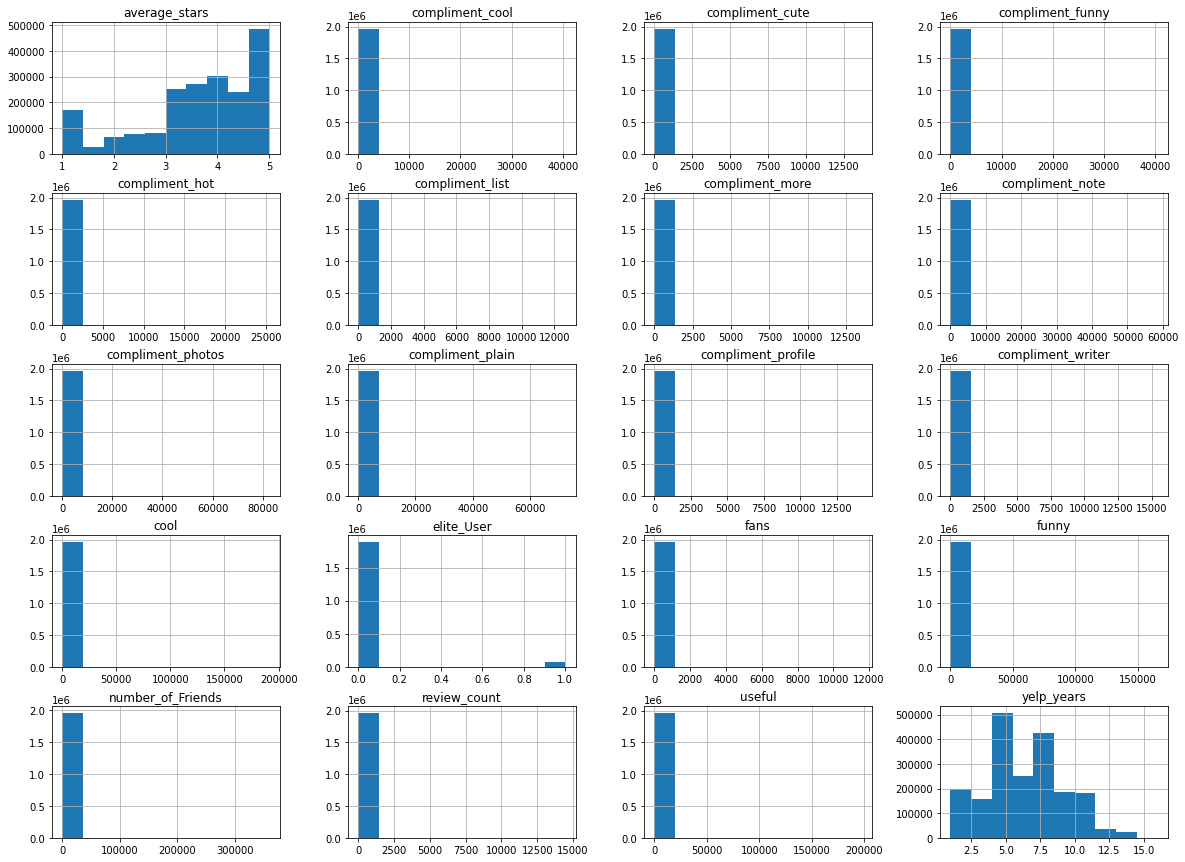

In [13]:
df.hist(figsize=(20,15))

Analyzing between the Elite vs Non-Eilte user's in the dataset

In [14]:
#Total number of Elite(1) and Non-Elite(0) in the data
elite_users = df['elite_User'].value_counts()
print(elite_users)

0    1892742
1      75961
Name: elite_User, dtype: int64


Text(0.5, 1.0, 'elite vs. normal users')

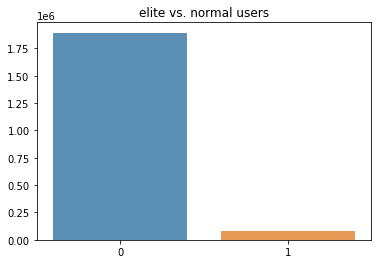

In [15]:
sns.barplot(elite_users.index, elite_users.values, alpha=0.8)
plt.title('elite vs. normal users')

We can see that the data is highly imbalnced and needs some kind of sampling or parameter tuning to be done.

In [16]:
elite = df.loc[df['elite_User'] == 1]
elite.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,yelp_years,elite_User,number_of_Friends
1,FOBRPlBHa3WPHFB5qYDlVg,Michelle,564,2008-04-28 01:29:25,790,316,400,"2008,2009,2010,2011,2012,2013","ly7EnE8leJmyqyePVYFlug, pRlR63iDytsnnniPb3AOug...",27,3.84000,36,4,5,2,1,33,37,63,63,21,5,12,1,5110
2,zZUnPeh2hEp0WydbAZEOOg,Martin,60,2008-08-28 23:40:05,151,125,103,2010,"Uwlk0txjQBPw_JhHsQnyeg, Ybxr1tSCkv3lYA0I1qmnPQ...",5,3.44000,9,6,0,1,0,3,7,17,17,4,1,12,1,838
3,QaELAmRcDc5TfJEylaaP8g,John,206,2008-09-20 00:08:14,233,160,84,2009,"iog3Nyg1i4jeumiTVG_BSA, M92xWY2Vr9w0xoH8bPplfQ...",6,3.08000,2,1,0,0,0,7,14,7,7,2,0,12,1,4150
4,xvu8G900tezTzbbfqmTKvA,Anne,485,2008-08-09 00:30:27,1265,400,512,"2009,2010,2011,2012,2014,2015,2016,2017,2018","3W3ZMSthojCUirKEqAwGNw, eTIbuu23j9tOgmIa9POyLQ...",78,4.37000,8,9,2,1,1,22,28,31,31,19,31,12,1,21478
5,z5_82komKV3mI4ASGe2-FQ,Steve,186,2007-02-27 07:09:40,642,192,155,2007,"E-fXXmALnZTPmzzL6rV4cQ, L2g6vS1GDfqLEpiDOFfCkA...",15,2.88000,24,16,7,7,2,60,36,32,32,8,9,13,1,2158


In [17]:
avg_review_count = elite['review_count'].mean()
print('Average :', avg_review_count)

Average : 236.5715827859033


Text(0, 0.5, 'Count')

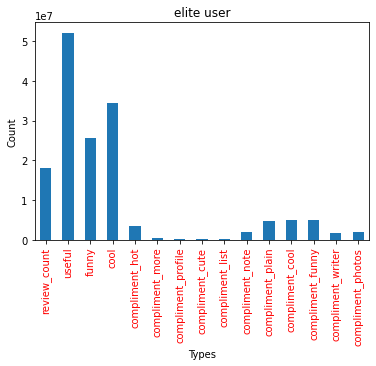

In [18]:
elite[['review_count','useful','funny','cool','compliment_hot','compliment_more','compliment_profile','compliment_cute',
       'compliment_list',	'compliment_note','compliment_plain',	'compliment_cool',	'compliment_funny',	'compliment_writer',
       'compliment_photos']].sum().plot(kind='bar')
labels = ['review_count','useful','funny','cool','compliment_hot','compliment_more','compliment_profile','compliment_cute',
       'compliment_list',	'compliment_note','compliment_plain',	'compliment_cool',	'compliment_funny',	'compliment_writer',
       'compliment_photos']
y_pos = np.arange(len(labels))
plt.xticks(y_pos, labels, color='red')
plt.title("elite user")
plt.xlabel('Types')
plt.ylabel('Count')

In [19]:
Not_elite = df.loc[df['elite_User'] == 0]
Not_elite.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,yelp_years,elite_User,number_of_Friends
0,ntlvfPzc8eglqvk92iDIAw,Rafael,553,2007-07-06 03:27:11,628,225,227,,"oeMvJh94PiGQnx_6GlndPQ, wm1z1PaJKvHgSDRKfwhfDg...",14,3.57000,3,2,1,0,1,11,15,22,22,10,0,13,0,1078
6,ttumcu6hWshk_EJVWrduDg,Stuart,12,2010-05-12 16:30:08,29,4,6,,"1pKOc55fFx09J5t2rPzTxw, HYpE14yYEKSgu3VNVzObHA...",0,4.00000,0,0,0,0,0,2,3,0,0,0,1,10,0,1294
8,UYACF30806j2mfbB5vdmJA,Justin,14,2007-07-24 23:55:21,68,21,34,,"YwaKGmRNnSa3R3N4Hf9jLw, v9YpDzYkJarRbzvVIY-63g...",4,3.75000,0,3,0,0,0,3,4,0,0,2,1,13,0,2038
10,f6YuZP6iennHFVlnFJOXLQ,Nic,5,2008-08-10 12:57:20,6,0,8,,"FnTvI5HtztNRhrNGp2GKsQ, LaAPGLcUPM35FuVyBLRQ1g...",5,3.80000,5,0,1,0,0,1,4,2,2,2,0,12,0,646
13,HwPGLzF_uXB3MF8bc5u5dg,TJ,6,2009-01-02 19:09:32,16,9,14,,"XEHZoTDWjw3w-gcQyYIe4g, KyeCA8acObsNpgU3fH0W0A...",0,4.50000,0,1,0,1,0,0,0,1,1,0,0,11,0,190


In [20]:
avg_review_count_NOT_elite = Not_elite['review_count'].mean()
print('Average :', avg_review_count_NOT_elite)

Average : 13.564738881474602


Text(0, 0.5, 'Count')

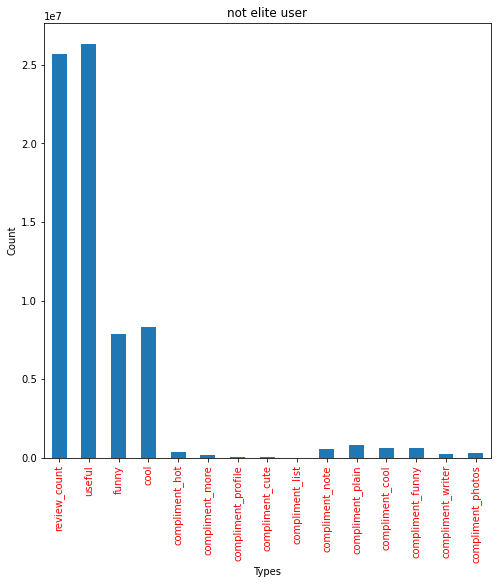

In [21]:
plt.figure(figsize=(8,8))
Not_elite[['review_count','useful','funny','cool','compliment_hot','compliment_more','compliment_profile','compliment_cute',
       'compliment_list',	'compliment_note','compliment_plain',	'compliment_cool',	'compliment_funny',	'compliment_writer',
       'compliment_photos']].sum().plot(kind='bar')
labels = ['review_count','useful','funny','cool','compliment_hot','compliment_more','compliment_profile','compliment_cute',
       'compliment_list',	'compliment_note','compliment_plain',	'compliment_cool',	'compliment_funny',	'compliment_writer',
       'compliment_photos']
y_pos = np.arange(len(labels))
plt.xticks(y_pos, labels, color='red')
plt.title("not elite user")
plt.xlabel('Types')
plt.ylabel('Count')

In [22]:
df['yelp_years'].unique()

array([13, 12, 10,  9, 11, 15, 14, 16,  8,  7,  6,  5,  4,  3,  2,  1])

([<matplotlib.axis.XTick at 0x7f70cc258b00>,
 [Text(0, 0, '13'),
  Text(1, 0, '12'),
  Text(2, 0, '10'),
  Text(3, 0, '9'),
  Text(4, 0, '11'),
  Text(5, 0, '15'),
  Text(6, 0, '14'),
  Text(7, 0, '16'),
  Text(8, 0, '8'),
  Text(9, 0, '7'),
  Text(10, 0, '6'),
  Text(11, 0, '5'),
  Text(12, 0, '4'),
  Text(13, 0, '3'),
  Text(14, 0, '2'),
  Text(15, 0, '1')])

<Figure size 576x576 with 0 Axes>

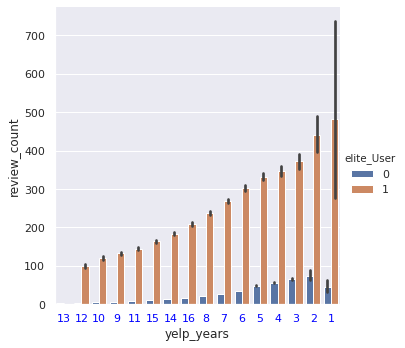

In [23]:
plt.figure(figsize=(8,8))
sns.set()
sns.catplot(x="yelp_years", y="review_count", hue="elite_User", kind="bar", data=df);
labels = ['13', '12', '10',  '9', '11', '15', '14', '16',  '8',  '7',  '6',  '5',  '4',  '3',  '2',  '1']
y_pos = np.arange(len(labels))
plt.xticks(y_pos, labels, color='blue', rotation=0)

<Figure size 576x576 with 0 Axes>

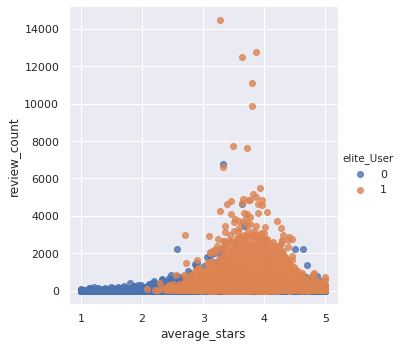

In [24]:
#Scatterplot of stars vs reviews compared between elite and non-elite
plt.figure(figsize=(8,8))
sns.lmplot( x='average_stars', y='review_count',data=df ,fit_reg=False, hue='elite_User', legend=True,)

# Data Cleaning and Sampling

1. UnderSampling the majority class.


In [0]:
df_1 = df.copy()

In [26]:
#Dropping irrelavant columns
df_1.drop(['user_id', 'name','yelping_since','elite', 'friends','yelp_years'],axis =1, inplace=True)
df_1.head()

,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,elite_User,number_of_Friends
0,553,628,225,227,14,3.57000,3,2,1,0,1,11,15,22,22,10,0,0,1078
1,564,790,316,400,27,3.84000,36,4,5,2,1,33,37,63,63,21,5,1,5110
2,60,151,125,103,5,3.44000,9,6,0,1,0,3,7,17,17,4,1,1,838
3,206,233,160,84,6,3.08000,2,1,0,0,0,7,14,7,7,2,0,1,4150
4,485,1265,400,512,78,4.37000,8,9,2,1,1,22,28,31,31,19,31,1,21478


In [0]:
elite_df = df_1.loc[df_1['elite_User'] == 1]

In [0]:
non_elite_df = df_1.loc[df['elite_User'] == 0][:75961]

In [0]:
normal_distributed_df = pd.concat([elite_df, non_elite_df])

In [30]:
# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)
new_df.head()

,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,elite_User,number_of_Friends
1219335,55,82,13,27,2,4.48000,3,0,0,0,0,2,3,3,3,3,1,1,5038
27566,24,25,8,9,1,3.52000,0,0,0,0,0,0,0,0,0,0,1,0,94
53417,26,22,6,11,0,3.11000,0,0,0,0,0,0,0,0,0,0,0,0,646
89540,72,70,15,20,3,3.94000,0,0,0,0,0,0,3,1,1,1,0,0,286
198562,440,2073,483,1523,90,4.05000,112,4,4,1,1,64,66,147,147,127,77,1,25822


Distribution of the Classes in the subsample dataset
1   0.50000
0   0.50000
Name: elite_User, dtype: float64


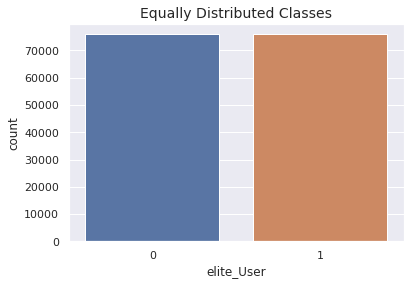

In [31]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['elite_User'].value_counts()/len(new_df))
sns.countplot('elite_User', data=new_df)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

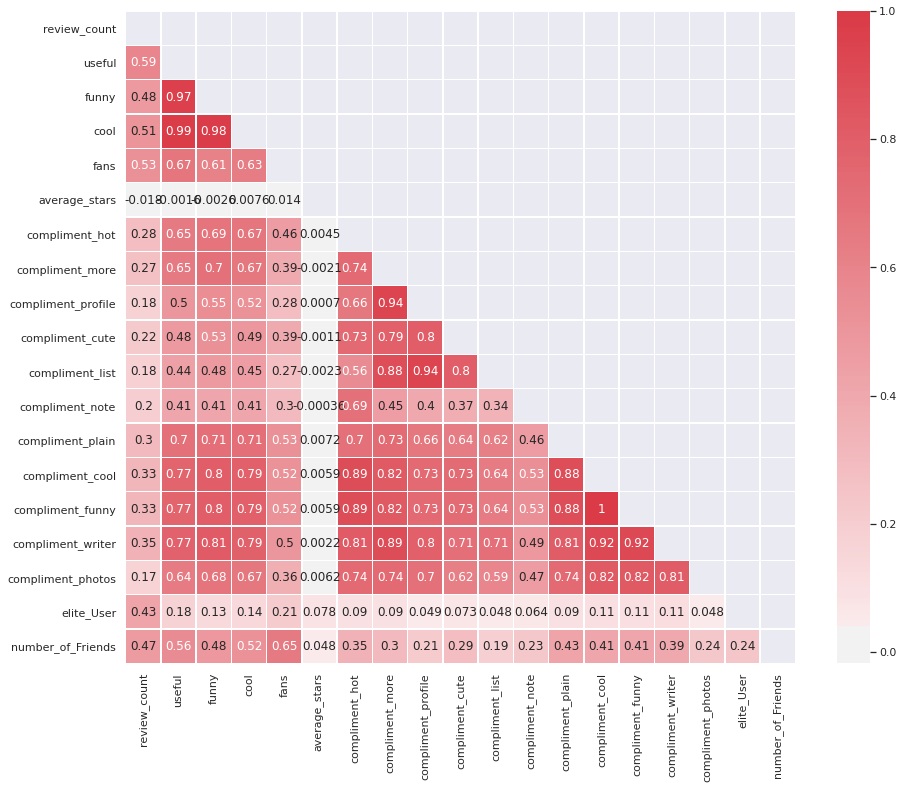

In [32]:
#Co-relation plot
corr = new_df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15, 12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr,mask=mask, cmap=cmap, center=0,
            square=False, linewidths=.5, annot=True)

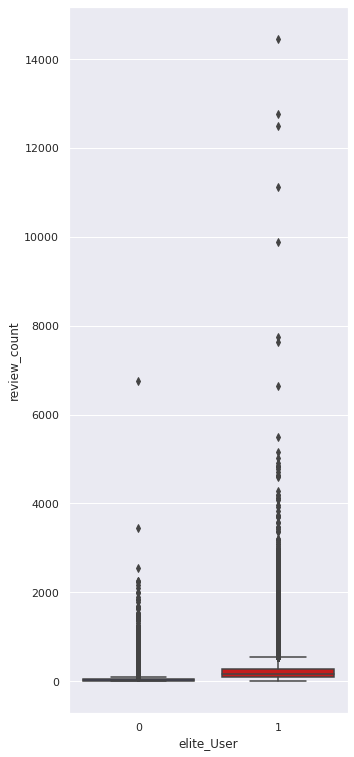

In [33]:
#we can see that review_count has highest positive correlation with elite_User
# Positive correlations (The higher the feature the probability increases the chance of elite_User)
plt.figure(figsize=(5,13))
colors = ["#0101DF", "#DF0101"]
sns.boxplot(x="elite_User", y="review_count", data=new_df, palette=colors)

Anomaly Detection:
Our main aim in this section is to remove "extreme outliers" from above feature which has a high correlation with our classes. This will have a positive impact on the accuracy of our models.

Text(0.5, 1.0, 'review_count_distribution')

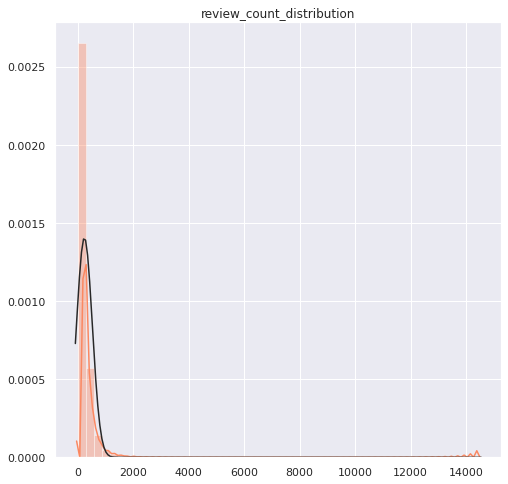

In [34]:
#Visualize initial Distribution:
from scipy.stats import norm
plt.figure(figsize=(8,8))
review_count_dist = new_df['review_count'].loc[new_df['elite_User'] == 1].values
sns.distplot(review_count_dist, fit=norm, color='#FB8861')
plt.title("review_count_distribution")

In [35]:
# # -----> Removing Outliers from review_count(Highest positive correlated)
review_count_vals = new_df['review_count'].loc[new_df['elite_User'] == 1].values
q25, q75 = np.percentile(review_count_vals, 25), np.percentile(review_count_vals, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
review_count_iqr = q75 - q25
print('iqr: {}'.format(review_count_iqr))

review_count_cut_off = review_count_iqr * 1.5
review_count_lower, review_count_upper = q25 - review_count_cut_off, q75 + review_count_cut_off
print('Cut Off: {}'.format(review_count_cut_off))
print('V14 Lower: {}'.format(review_count_lower))
print('V14 Upper: {}'.format(review_count_upper))

outliers = [x for x in review_count_vals if x < review_count_lower or x > review_count_upper]
print('Feature V14 Outliers for Elite Users: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

Quartile 25: 93.0 | Quartile 75: 277.0
iqr: 184.0
Cut Off: 276.0
V14 Lower: -183.0
V14 Upper: 553.0
Feature V14 Outliers for Elite Users: 5802
V10 outliers:[1158, 935, 796, 654, 702, 901, 583, 875, 686, 784, 754, 620, 745, 838, 1280, 2447, 1293, 2799, 711, 683, 577, 667, 931, 638, 868, 703, 738, 1355, 1168, 953, 644, 1196, 794, 1148, 586, 605, 2218, 653, 665, 748, 570, 909, 1859, 1040, 711, 716, 630, 898, 816, 848, 562, 1072, 677, 643, 558, 742, 574, 988, 588, 777, 960, 638, 633, 982, 594, 565, 590, 639, 1155, 652, 753, 788, 598, 1416, 821, 556, 686, 583, 898, 772, 581, 664, 562, 727, 693, 776, 1009, 619, 722, 861, 699, 568, 2570, 932, 1031, 1160, 1109, 1198, 834, 627, 631, 1568, 768, 937, 598, 707, 780, 711, 641, 585, 657, 575, 625, 686, 1605, 799, 757, 570, 584, 562, 676, 799, 612, 1126, 708, 622, 1190, 687, 561, 821, 756, 631, 1445, 1816, 583, 592, 1631, 760, 814, 1252, 699, 1030, 638, 723, 770, 1101, 610, 678, 784, 1257, 610, 627, 641, 838, 937, 628, 787, 894, 1066, 645, 1374, 1057

In [36]:
#Before removing Outliers
new_df.shape

(151922, 19)

In [37]:
#Removing Outliers
new_df = new_df.drop(new_df[(new_df['review_count'] > review_count_upper) | (new_df['review_count'] < review_count_lower)].index)
new_df.shape

(145889, 19)

Text(0.5, 1.0, 'Boxplot after removing outliers')

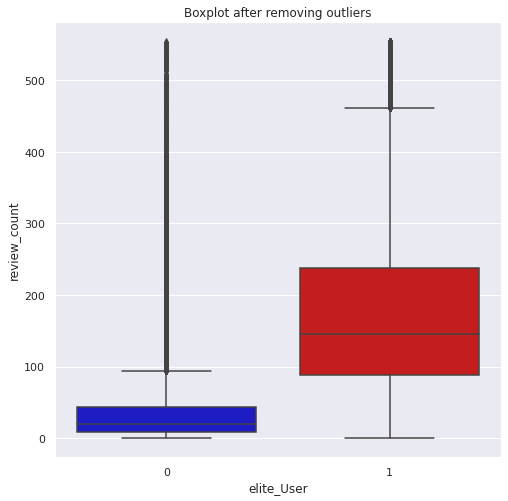

In [38]:
plt.figure(figsize=(8,8))
sns.boxplot(x="elite_User", y="review_count", data=new_df, palette=colors)
plt.title("Boxplot after removing outliers")

In [0]:
# T-SNE Implementation for Undersampled data
from sklearn.manifold import TSNE
# New_df is from the random undersample data (fewer instances)
X = new_df.drop('elite_User', axis=1)
y = new_df['elite_User']
tsne_model = TSNE(n_components = 2,perplexity = 40,learning_rate = 50,n_iter = 500).fit_transform(X.values)

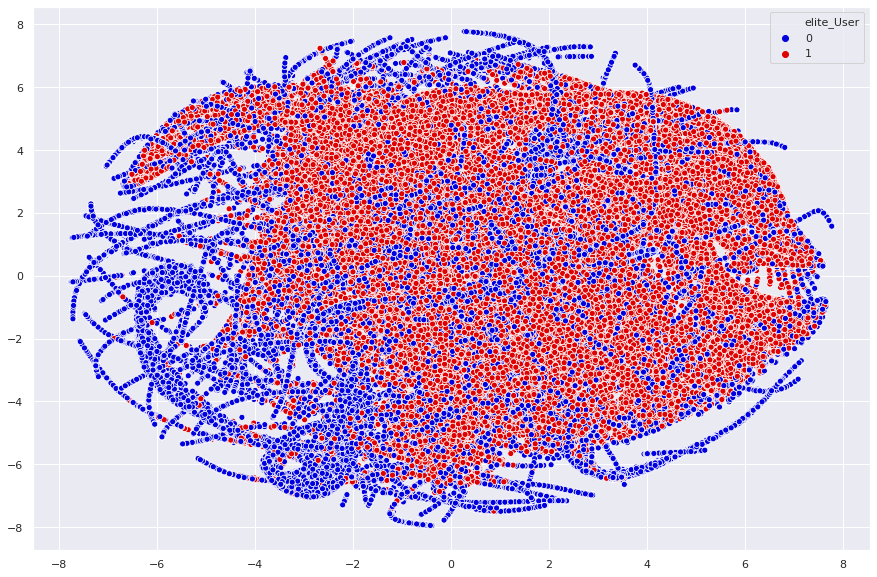

In [40]:
sns.set(rc={'figure.figsize':(15,10)})
sns.scatterplot(tsne_model[:,0], tsne_model[:,1], hue=y, legend='full', palette=colors)

# Logistic Regression on Undersampled Data

In [0]:
X = new_df.drop('elite_User', axis=1)
y = new_df['elite_User']

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [0]:
# All the columns are highly biased or normally distributed,hence no column transformations done.
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_std,y,test_size=0.2,random_state=1)

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
clf = LogisticRegression()

In [46]:
clf_model = clf.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [47]:
clf_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
x_train_probs = clf_model.predict_proba(x_train)
x_test_probs = clf_model.predict_proba(x_test)

In [0]:
x_train_probs_df = pd.DataFrame(x_train_probs)
x_test_probs_df = pd.DataFrame(x_test_probs)

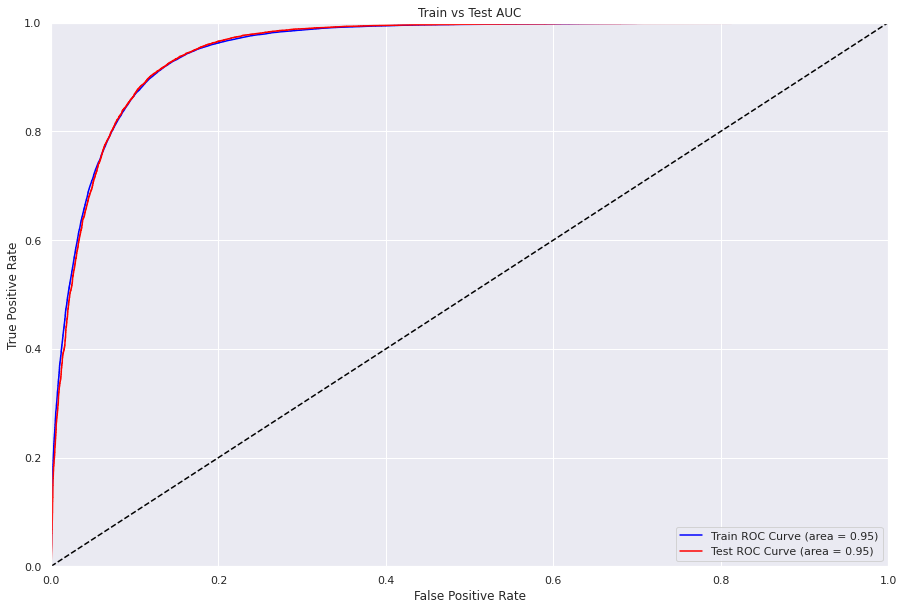

In [50]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
plt.plot(roc_curve(y_train, x_train_probs_df[1])[0],roc_curve(y_train, x_train_probs_df[1])[1],color = 'blue', label='Train ROC Curve (area = %0.2f)' % roc_auc_score(y_train, x_train_probs_df[1]))
plt.plot(roc_curve(y_test, x_test_probs_df[1])[0],roc_curve(y_test,x_test_probs_df[1])[1],color = 'red', label='Test ROC Curve (area = %0.2f)' % roc_auc_score(y_test, x_test_probs_df[1]))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Train vs Test AUC')
plt.legend()
plt.show()

In [0]:
x_test_probs_df['elite'] = x_test_probs_df[1].map(lambda x: 1 if x > 0.3 else 0)

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test, x_test_probs_df['elite']))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89     15077
           1       0.86      0.92      0.89     14101

    accuracy                           0.89     29178
   macro avg       0.89      0.89      0.89     29178
weighted avg       0.89      0.89      0.89     29178



AUC : 0.95 ; Accuracy: 89% ; Precision: 0.92 ; Recall: 0.86

We can see that the model has good AUC score along with high precison,recall and accuracy as well.

# Trying both UnderSampling and OverSampling

When we oversampling the data it is always better to limit our synthetically generated data to 30%.
So we will try to generate 0.3(75961) rows for elite users and under-sample non-elite category to that value.

In [0]:
#generate approx 30% greater rows than the total elite users
non_elite_df_2 = df_1.loc[df['elite_User'] == 0][:100000]

In [0]:
normal_distributed_df = pd.concat([elite_df, non_elite_df_2])

In [0]:
# Shuffle dataframe rows
new_df_1= normal_distributed_df.sample(frac=1, random_state=42)

In [56]:
# # -----> Removing Outliers from review_count(Highest positive correlated)
review_count_vals = new_df_1['review_count'].loc[new_df_1['elite_User'] == 1].values
q25, q75 = np.percentile(review_count_vals, 25), np.percentile(review_count_vals, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
review_count_iqr = q75 - q25
print('iqr: {}'.format(review_count_iqr))

review_count_cut_off = review_count_iqr * 1.5
review_count_lower, review_count_upper = q25 - review_count_cut_off, q75 + review_count_cut_off
print('Cut Off: {}'.format(review_count_cut_off))
print('V14 Lower: {}'.format(review_count_lower))
print('V14 Upper: {}'.format(review_count_upper))

outliers = [x for x in review_count_vals if x < review_count_lower or x > review_count_upper]
print('Feature V14 Outliers for Elite Users: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

Quartile 25: 93.0 | Quartile 75: 277.0
iqr: 184.0
Cut Off: 276.0
V14 Lower: -183.0
V14 Upper: 553.0
Feature V14 Outliers for Elite Users: 5802
V10 outliers:[756, 699, 681, 588, 1981, 2071, 658, 858, 672, 948, 1084, 768, 581, 615, 1157, 773, 702, 1252, 1532, 703, 863, 1059, 588, 676, 784, 670, 616, 747, 1798, 616, 3379, 701, 1775, 898, 1091, 646, 790, 813, 893, 633, 719, 665, 838, 641, 601, 881, 628, 750, 668, 634, 719, 1378, 562, 560, 776, 672, 802, 610, 773, 709, 931, 770, 843, 612, 1143, 682, 1003, 1987, 623, 1353, 683, 568, 562, 561, 1512, 947, 591, 1025, 797, 1266, 899, 814, 989, 1084, 828, 760, 571, 652, 818, 953, 614, 1568, 562, 979, 568, 850, 571, 601, 1089, 800, 807, 624, 562, 1568, 609, 774, 746, 725, 1001, 620, 1025, 2138, 618, 563, 594, 1399, 571, 689, 712, 1421, 648, 911, 1105, 582, 568, 1028, 1001, 1376, 2490, 609, 1401, 1097, 905, 866, 2515, 1019, 994, 978, 960, 742, 800, 987, 560, 626, 890, 797, 731, 844, 1330, 1309, 1258, 743, 1345, 562, 610, 701, 567, 664, 570, 589, 62

In [57]:
#Before removing Outliers
new_df_1.shape

(175961, 19)

In [58]:
#Removing Outliers
new_df_1 = new_df_1.drop(new_df_1[(new_df_1['review_count'] > review_count_upper) | (new_df_1['review_count'] < review_count_lower)].index)
new_df_1.shape

(169923, 19)

In [59]:
new_df_1['elite_User'].value_counts()

0    99764
1    70159
Name: elite_User, dtype: int64

Oversampling using SMOTE

In [0]:
X = new_df_1.drop(['elite_User'],axis=1)
Y = new_df_1['elite_User']

In [61]:
#Using SMOTE for class imbalance in target
from imblearn.over_sampling import SMOTE
from collections import Counter
sm = SMOTE(random_state=42)
X_resamp_tr, y_resamp_tr = sm.fit_resample(X, Y)
print('Resampled dataset shape %s' % Counter(y_resamp_tr))
X_resamp_tr = pd.DataFrame(X_resamp_tr)
y_resamp_tr = pd.DataFrame({"elite_User": y_resamp_tr})

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Resampled dataset shape Counter({0: 99764, 1: 99764})


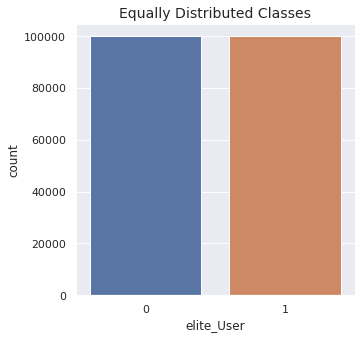

In [62]:
plt.figure(figsize=(5,5))
sns.countplot('elite_User', data=y_resamp_tr)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

#Logistic Regression on both UnderSampled and Oversampled data

In [0]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X_resamp_tr)

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_std,y_resamp_tr,test_size=0.2,random_state=1)

In [0]:
clf = LogisticRegression()

In [66]:
clf_model = clf.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
x_train_probs = clf_model.predict_proba(x_train)
x_test_probs = clf_model.predict_proba(x_test)

In [0]:
x_train_probs_df = pd.DataFrame(x_train_probs)
x_test_probs_df = pd.DataFrame(x_test_probs)

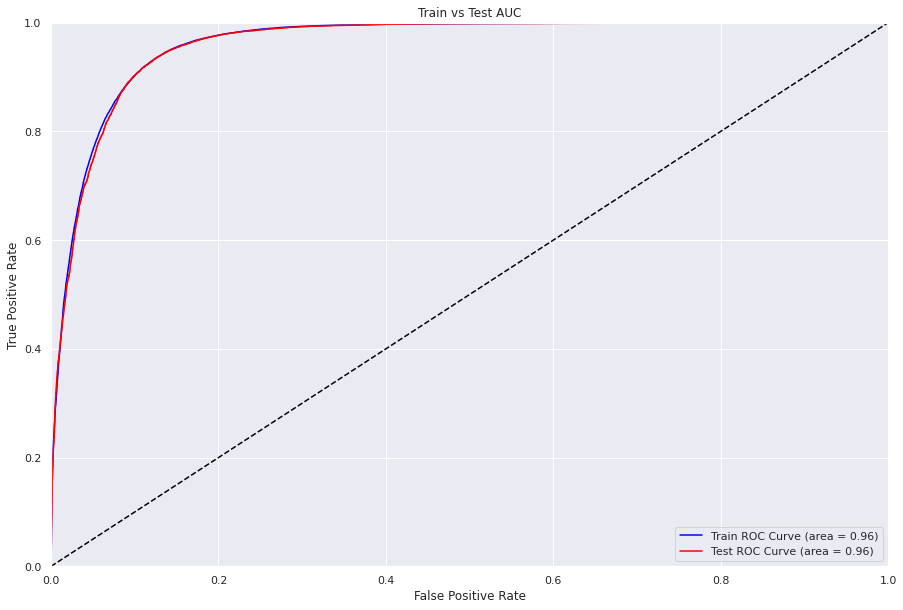

In [69]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
plt.plot(roc_curve(y_train, x_train_probs_df[1])[0],roc_curve(y_train, x_train_probs_df[1])[1],color = 'blue', label='Train ROC Curve (area = %0.2f)' % roc_auc_score(y_train, x_train_probs_df[1]))
plt.plot(roc_curve(y_test, x_test_probs_df[1])[0],roc_curve(y_test,x_test_probs_df[1])[1],color = 'red', label='Test ROC Curve (area = %0.2f)' % roc_auc_score(y_test, x_test_probs_df[1]))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Train vs Test AUC')
plt.legend()
plt.show()

In [0]:
x_test_probs_df['elite'] = x_test_probs_df[1].map(lambda x: 1 if x > 0.4 else 0)

In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_test, x_test_probs_df['elite']))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90     19875
           1       0.90      0.90      0.90     20031

    accuracy                           0.90     39906
   macro avg       0.90      0.90      0.90     39906
weighted avg       0.90      0.90      0.90     39906



AUC : 0.96 ; Accuracy: 90% ; Precision: 0.90 ; Recall: 0.90

We have seen that there has been improvement of AUC compared to just undersampled data. Moreover, we are able to see that the classification task is quite simple as we haven't even tuned the parameters of Logistic Regression and are yet able to acheive high scores.

#Guassian Naive Bayes

-> Looking at the dataframe we can see that almost all our feature columns are filled with continous values. So it would be appropriate to use Guassinan Naive Bayes Model for classification.

In [0]:
gbayes_df = new_df_1.copy()

In [73]:
gbayes_df.columns

Index(['review_count', 'useful', 'funny', 'cool', 'fans', 'average_stars',
       'compliment_hot', 'compliment_more', 'compliment_profile',
       'compliment_cute', 'compliment_list', 'compliment_note',
       'compliment_plain', 'compliment_cool', 'compliment_funny',
       'compliment_writer', 'compliment_photos', 'elite_User',
       'number_of_Friends'],
      dtype='object')

In [0]:
#We can see that most of the columns are not following the normal distribution.
#Let's normalize the data before implementing the model
from sklearn import preprocessing
cols=gbayes_df.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(gbayes_df)
gbayes_df_normalized = pd.DataFrame(np_scaled, columns = cols)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f70ade77c88>,
      dtype=object)

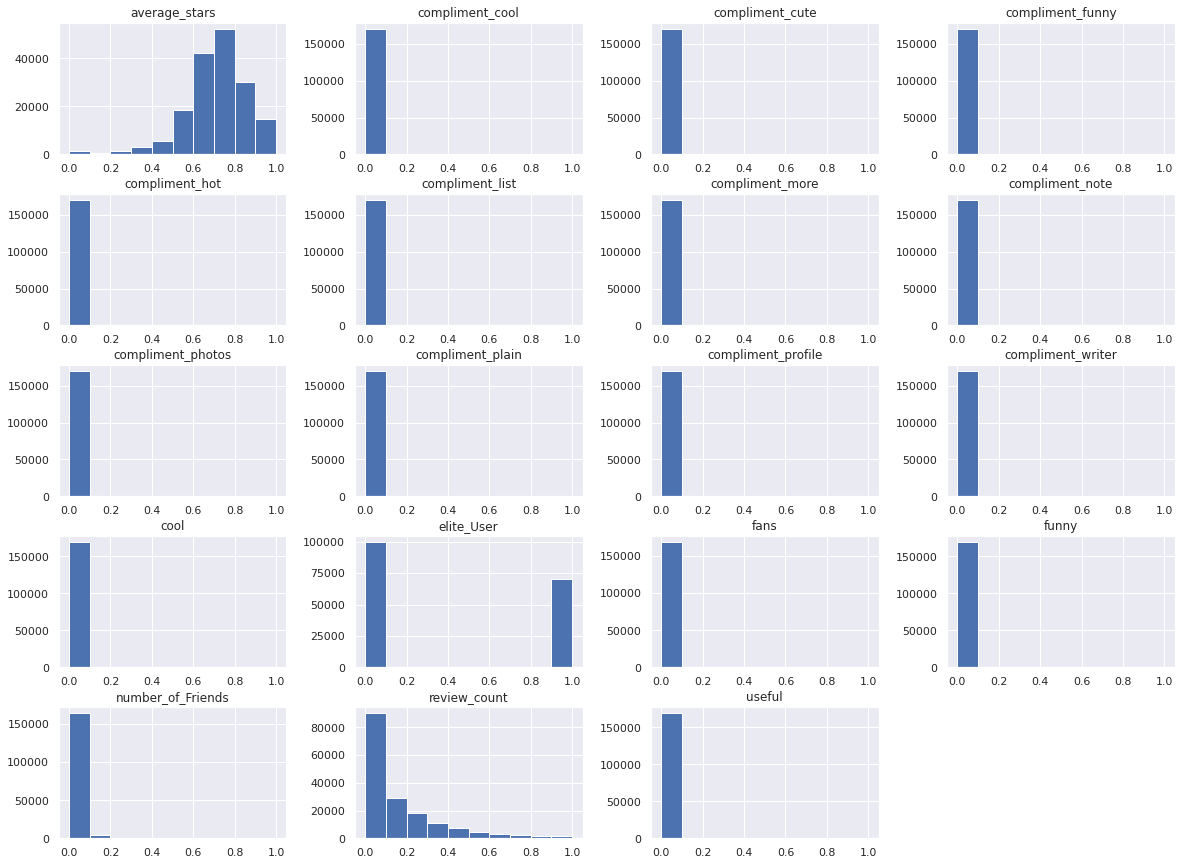

In [75]:
gbayes_df_normalized.hist(figsize=(20,15),bins=10)

In [0]:
#The columns are still very biased
#Implementing Naive Bayes
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(gbayes_df_normalized.drop(columns='elite_User'), 
                                                    gbayes_df_normalized['elite_User'], 
                                                    test_size=0.2, 
                                                    random_state=1)

In [0]:
from sklearn.naive_bayes import GaussianNB
gnb_clf = GaussianNB()

In [0]:
gnb_model = gnb_clf.fit(x_train, y_train)

In [0]:
train_probs = gnb_model.predict(x_train)
test_probs = gnb_model.predict(x_test)

In [80]:
from sklearn.metrics import accuracy_score
gnb_accuracy_train= accuracy_score(y_train,train_probs)
print('The train accuracy using Guassian Naive bayes is: '+ str(gnb_accuracy_train))

The train accuracy using Guassian Naive bayes is: 0.7207697626859304


In [81]:
from sklearn.metrics import accuracy_score
gnb_accuracy_test=accuracy_score(y_test,test_probs)
print('The test accuracy using Guassian Naive bayes is: '+ str(gnb_accuracy_test))

The test accuracy using Guassian Naive bayes is: 0.724966897160512


In [82]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_train,train_probs)
metrics.auc(fpr, tpr)

0.6646224670081569

In [83]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,test_probs)
metrics.auc(fpr, tpr)

0.6669304761061108

In [84]:
x_test_probs_df_nb= pd.DataFrame(test_probs)
from sklearn.metrics import classification_report
print(classification_report(y_test, x_test_probs_df_nb[0]))

              precision    recall  f1-score   support

         0.0       0.68      0.99      0.81     20050
         1.0       0.96      0.34      0.51     13935

    accuracy                           0.72     33985
   macro avg       0.82      0.67      0.66     33985
weighted avg       0.80      0.72      0.69     33985



We can see that GNB has resulted in very low AUC as most of our columns were still biased after transformation and didn't follow a normal distribution. Hence we can say Naive Bayes is not a good model for this problem.

But considering the size of our data, it is not appropriate to just use 10% of it for developing out model. We can try to develop models using tree algorithms as they provide ensemble learning and have in-built parameters to deal with data imbalance.

We have decided to work with three algorithms
1. Random Forests
2. XGBoost
3. LightGBM

# Random Forest Classifier

In [0]:
rfc_df = df.copy()

In [86]:
rfc_df.columns

Index(['user_id', 'name', 'review_count', 'yelping_since', 'useful', 'funny',
       'cool', 'elite', 'friends', 'fans', 'average_stars', 'compliment_hot',
       'compliment_more', 'compliment_profile', 'compliment_cute',
       'compliment_list', 'compliment_note', 'compliment_plain',
       'compliment_cool', 'compliment_funny', 'compliment_writer',
       'compliment_photos', 'yelp_years', 'elite_User', 'number_of_Friends'],
      dtype='object')

In [0]:
#Only trying to include the original Columns as we feel our new columns are making the prediction very easy.
col =['review_count', 'useful', 'funny',
       'cool', 'fans', 'average_stars', 'compliment_hot',
       'compliment_more', 'compliment_profile', 'compliment_cute',
       'compliment_list', 'compliment_note', 'compliment_plain',
       'compliment_cool', 'compliment_funny', 'compliment_writer',
       'compliment_photos']

In [0]:
X = rfc_df[col]
y = rfc_df['elite_User']

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [0]:
from sklearn.ensemble import RandomForestClassifier
#rf = RandomForestClassifier(random_state = 0, n_jobs = -1)

In [0]:
# #Grid search to find the optimal parameters
# n_estimators = [100, 300, 500]
# max_depth = [5, 8, 15]
# min_samples_split = [2, 5, 10]
# min_samples_leaf = [5, 10, 20]
# hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,
#  min_samples_split = min_samples_split,
#  min_samples_leaf = min_samples_leaf)

In [0]:
# from sklearn.model_selection import GridSearchCV
# gridF = GridSearchCV(estimator=rf,param_grid= hyperF, cv=5)

In [93]:
#gridF.fit(x_train, y_train)
'''gridF.best_params_
{'max_depth': 5,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 100}
'''

"gridF.best_params_\n{'max_depth': 5,\n 'min_samples_leaf': 5,\n 'min_samples_split': 2,\n 'n_estimators': 100}\n"

In [0]:
rf2 = RandomForestClassifier(random_state = 0, n_jobs = -1,max_depth = 5,min_samples_leaf =5,min_samples_split = 2, n_estimators =100 )

In [0]:
rf2_model = rf2.fit(x_train, y_train)

In [0]:
x_train_probs = rf2_model.predict_proba(x_train)
x_test_probs = rf2_model.predict_proba(x_test)
x_train_probs_df = pd.DataFrame(x_train_probs)
x_test_probs_df = pd.DataFrame(x_test_probs)

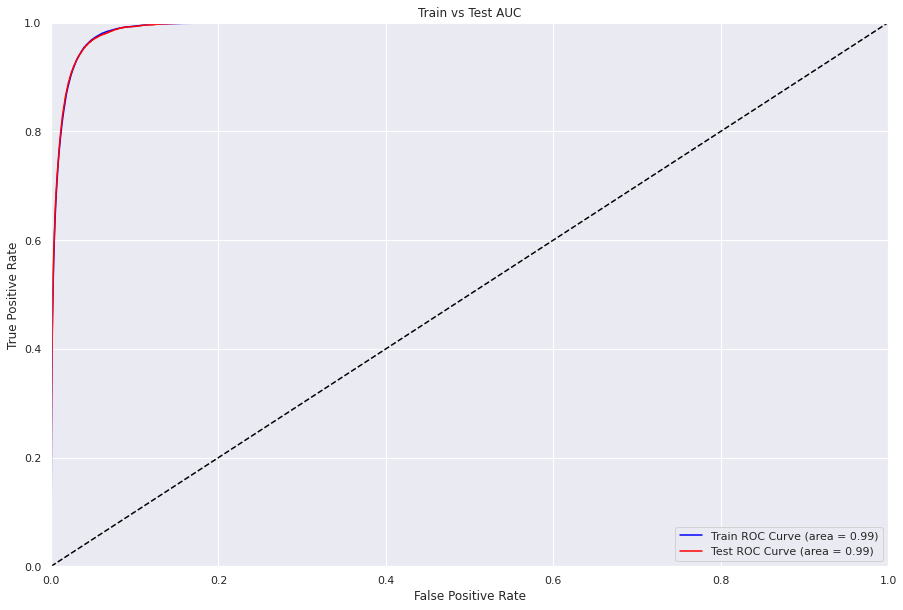

In [97]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
plt.plot(roc_curve(y_train, x_train_probs_df[1])[0],roc_curve(y_train, x_train_probs_df[1])[1],color = 'blue', label='Train ROC Curve (area = %0.2f)' % roc_auc_score(y_train, x_train_probs_df[1]))
plt.plot(roc_curve(y_test, x_test_probs_df[1])[0],roc_curve(y_test,x_test_probs_df[1])[1],color = 'red', label='Test ROC Curve (area = %0.2f)' % roc_auc_score(y_test, x_test_probs_df[1]))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Train vs Test AUC')
plt.legend()
plt.show()
sns.set(style='white', rc={'figure.figsize':(10,10)})

The Model recored a very high test and train AUC.

Feature Impotance:This approach directly measures feature importance by observing how random re-shuffling (thus preserving the distribution of the variable) of each predictor influences model performance.

In [98]:
rf2_model.feature_importances_

array([9.70243465e-02, 4.15739880e-02, 9.14117272e-03, 2.13571441e-01,
       1.29991267e-01, 4.58560905e-03, 2.49803802e-02, 5.22694071e-04,
       2.64717579e-05, 1.66558802e-04, 1.02593044e-05, 7.74956257e-03,
       2.77608018e-02, 1.34402494e-01, 1.93629346e-01, 1.12432715e-01,
       2.43089234e-03])

In [0]:
feature_imp_rf = dict(sorted(zip(cols,map(lambda x: round(x, 4), rf2.feature_importances_)), 
             reverse=True))

In [100]:
print(feature_imp_rf)

{'useful': 0.0416, 'review_count': 0.097, 'funny': 0.0091, 'fans': 0.13, 'cool': 0.2136, 'compliment_writer': 0.1124, 'compliment_profile': 0.0, 'compliment_plain': 0.0278, 'compliment_photos': 0.0024, 'compliment_note': 0.0077, 'compliment_more': 0.0005, 'compliment_list': 0.0, 'compliment_hot': 0.025, 'compliment_funny': 0.1936, 'compliment_cute': 0.0002, 'compliment_cool': 0.1344, 'average_stars': 0.0046}


# XGBoost with Hyperopt

In [0]:
import xgboost as xgb

In [0]:
xgb_df = df.copy()

In [0]:
#Dropping irrelavant Columns
#Dropping irrelavant Columns
xgb_df.drop(['user_id', 'name','yelping_since','elite', 'friends','yelp_years','number_of_Friends'],axis =1, inplace=True)

In [104]:
xgb_df.head()

,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,elite_User
0,553,628,225,227,14,3.57000,3,2,1,0,1,11,15,22,22,10,0,0
1,564,790,316,400,27,3.84000,36,4,5,2,1,33,37,63,63,21,5,1
2,60,151,125,103,5,3.44000,9,6,0,1,0,3,7,17,17,4,1,1
3,206,233,160,84,6,3.08000,2,1,0,0,0,7,14,7,7,2,0,1
4,485,1265,400,512,78,4.37000,8,9,2,1,1,22,28,31,31,19,31,1


In [0]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_test, y_train, y_test = train_test_split(xgb_df.drop(columns='elite_User'), 
                                                    xgb_df['elite_User'], 
                                                    test_size=0.2, 
                                                    random_state=1)

In [0]:
x_train, x_val, y_train, y_val = train_test_split(x_train, 
                                                    y_train, 
                                                    test_size=0.2, 
                                                    random_state=1)

In [0]:
dtrain = xgb.DMatrix(data = x_train, label = y_train)
dval = xgb.DMatrix(data = x_val, label = y_val)
dtest = xgb.DMatrix(data = x_test, label = y_test)

In [0]:
import hyperopt as hp
from hyperopt import Trials,fmin,STATUS_OK

In [110]:
'''# Sets the space to search over and the prior probabilities over the search space 
xgb_space = {
    'booster': hp.hp.choice('booster',  ['gbtree']),
    'eta': hp.hp.loguniform('learning_rate', -4, 0),
    'max_depth':hp.hp.choice('max_depth', np.arange(10, 300,1, dtype=int)),
    'subsample':hp.hp.quniform('subsample',0.5,1.0,0.05),
    'colsample_bytree':hp.hp.quniform('colsample_bytree',0.5,1.0,0.05),
    'min_child_weight':hp.hp.quniform('min_child_weight', 100, 1000,100),
    'lambda': hp.hp.uniform('reg_alpha', 0.0, 1000.0),
    'alpha': hp.hp.uniform('reg_lambda', 0.0, 1000.0),
    'scale_pos_weight': hp.hp.uniform('scale_pos_weight', 6.0, 10.0),
    'eval_metric' : hp.hp.choice('eval_metric', ['auc']),
    'n_thread': hp.hp.choice('n_thread', [-1]),
    'verbose' : hp.hp.choice('verbose', [-1]),
    'maximize' : hp.hp.choice('maximize', ['TRUE'])
    }'''

"# Sets the space to search over and the prior probabilities over the search space \nxgb_space = {\n    'booster': hp.hp.choice('booster',  ['gbtree']),\n    'eta': hp.hp.loguniform('learning_rate', -4, 0),\n    'max_depth':hp.hp.choice('max_depth', np.arange(10, 300,1, dtype=int)),\n    'subsample':hp.hp.quniform('subsample',0.5,1.0,0.05),\n    'colsample_bytree':hp.hp.quniform('colsample_bytree',0.5,1.0,0.05),\n    'min_child_weight':hp.hp.quniform('min_child_weight', 100, 1000,100),\n    'lambda': hp.hp.uniform('reg_alpha', 0.0, 1000.0),\n    'alpha': hp.hp.uniform('reg_lambda', 0.0, 1000.0),\n    'scale_pos_weight': hp.hp.uniform('scale_pos_weight', 6.0, 10.0),\n    'eval_metric' : hp.hp.choice('eval_metric', ['auc']),\n    'n_thread': hp.hp.choice('n_thread', [-1]),\n    'verbose' : hp.hp.choice('verbose', [-1]),\n    'maximize' : hp.hp.choice('maximize', ['TRUE'])\n    }"

In [111]:
'''def objective_m(params, n_folds=5):


    model = xgb.cv(params = params,
              dtrain = dtrain,
              num_boost_round = 10,
              early_stopping_rounds = 10,
             nfold = n_folds)
  # returns the best average loss on validation set 
    
    loss = 1 - max(model['test-auc-mean'])
    return loss
bayes_trials = Trials()
MAX_EVALS = 100 # this controls the runtime 

xgb_best_m = fmin(fn = objective_m, space = xgb_space, algo = hp.tpe.suggest, 
max_evals = MAX_EVALS, trials = bayes_trials)'''

"def objective_m(params, n_folds=5):\n\n\n    model = xgb.cv(params = params,\n              dtrain = dtrain,\n              num_boost_round = 10,\n              early_stopping_rounds = 10,\n             nfold = n_folds)\n  # returns the best average loss on validation set \n    \n    loss = 1 - max(model['test-auc-mean'])\n    return loss\nbayes_trials = Trials()\nMAX_EVALS = 100 # this controls the runtime \n\nxgb_best_m = fmin(fn = objective_m, space = xgb_space, algo = hp.tpe.suggest, \nmax_evals = MAX_EVALS, trials = bayes_trials)"

In [0]:
#xgb_best_m

In [0]:
param = {
 'colsample_bytree': 0.8500000000000001,
 'eval_metric': 'auc',
 'learning_rate': 0.4186844500654863,
 'max_depth': 47,
 'maximize': 0,
 'min_child_weight': 300.0,
 'n_thread': 0,
 'reg_alpha': 893.3294360540369,
 'reg_lambda': 558.6265120005887,
 'scale_pos_weight': 8.779542508149722,
 'subsample': 0.9500000000000001,
 'verbose': 0
        }

In [114]:
watchlist = [(dtrain, 'train'), (dval, 'eval')]
num_round = 800
bst = xgb.train(param, dtrain, num_round, watchlist, early_stopping_rounds = 10)

[0]	train-auc:0.97918	eval-auc:0.978627
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 10 rounds.
[1]	train-auc:0.982809	eval-auc:0.982608
[2]	train-auc:0.988072	eval-auc:0.988439
[3]	train-auc:0.989399	eval-auc:0.989611
[4]	train-auc:0.990548	eval-auc:0.990544
[5]	train-auc:0.990992	eval-auc:0.990757
[6]	train-auc:0.991157	eval-auc:0.990901
[7]	train-auc:0.9913	eval-auc:0.991137
[8]	train-auc:0.991478	eval-auc:0.991202
[9]	train-auc:0.991725	eval-auc:0.991278
[10]	train-auc:0.991775	eval-auc:0.991288
[11]	train-auc:0.991904	eval-auc:0.991483
[12]	train-auc:0.99186	eval-auc:0.991522
[13]	train-auc:0.991957	eval-auc:0.991631
[14]	train-auc:0.991989	eval-auc:0.991653
[15]	train-auc:0.992048	eval-auc:0.991704
[16]	train-auc:0.992053	eval-auc:0.99173
[17]	train-auc:0.992087	eval-auc:0.991742
[18]	train-auc:0.992045	eval-auc:0.991675
[19]	train-auc:0.992087	eval-auc:0.991762
[20]	train-auc:0.992096	eval-auc:0

In [0]:
train_preds = x_train.copy()
train_preds['xgb_probs'] = bst.predict(dtrain)

test_preds = x_test.copy()
test_preds['xgb_probs'] = bst.predict(dtest)

In [0]:
from sklearn import metrics
scores_test = test_preds['xgb_probs']
scores_train = train_preds['xgb_probs']

In [117]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, scores_train)
metrics.auc(fpr, tpr)

0.9922448314557767

In [118]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, scores_test)
metrics.auc(fpr, tpr)

0.9922305616239077

Train AUC of XGBoost with optimization : 0.9922


Test AUC of XGBoost with optimization : 0.9922

#LightGBM with HyperOpt

In [0]:
X = df[col]
y = df['elite_User']

In [0]:
import lightgbm as lgb

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [0]:
x_train, x_val, y_train, y_val = train_test_split(x_train, 
                                                    y_train, 
                                                    test_size=0.2, 
                                                    random_state=1)

In [0]:
lgb_train = lgb.Dataset(x_train, y_train)
lgb_val = lgb.Dataset(x_val, y_val)

In [0]:
# lightgbm_hp_train = lgb.Dataset(x_train, y_train)
# lightgbm_hp_val = lgb.Dataset(x_val, y_val)

In [125]:
'''# Sets the space to search over and the prior probabilities over the search space 
lgbm_space = {

# hp.choice.choice will select 1 value from the given list  , 'dart', 'goss', 'rf'
    'boosting_type': hp.hp.choice('boosting_type',  ['gbdt']),
    'num_leaves':hp.hp.choice('num_leaves', np.arange(10, 300,1, dtype=int)),

    'subsample':hp.hp.quniform('subsample',0.5,1.0,0.05),
    'colsample_bytree':hp.hp.quniform('colsample_bytree',0.5,1.0,0.05),
    'min_child_weight':hp.hp.quniform('min_child_weight', 100, 1000,100),
    'reg_alpha': hp.hp.uniform('reg_alpha', 0.0, 1000.0),
    'reg_lambda': hp.hp.uniform('reg_lambda', 0.0, 1000.0),
    'learning_rate': hp.hp.loguniform('learning_rate', -4, 0),
    'feature_fraction': hp.hp.loguniform('feature_fraction', -4, 0),
    'bagging_fraction': hp.hp.loguniform('bagging_fraction', -4, 0),
    'bagging_frequency':hp.hp.choice('bagging_frequency', np.arange(5, 100,1, dtype=int)),
    'drop_rate': hp.hp.loguniform('drop_rate', -4, 0),
    'scale_pos_weight': hp.hp.uniform('scale_pos_weight', 6.0, 10.0),
    'metric' : 'auc',
    'nthread': 6, 
    'max_bin': 512
    }'''

"# Sets the space to search over and the prior probabilities over the search space \nlgbm_space = {\n\n# hp.choice.choice will select 1 value from the given list  , 'dart', 'goss', 'rf'\n    'boosting_type': hp.hp.choice('boosting_type',  ['gbdt']),\n    'num_leaves':hp.hp.choice('num_leaves', np.arange(10, 300,1, dtype=int)),\n\n    'subsample':hp.hp.quniform('subsample',0.5,1.0,0.05),\n    'colsample_bytree':hp.hp.quniform('colsample_bytree',0.5,1.0,0.05),\n    'min_child_weight':hp.hp.quniform('min_child_weight', 100, 1000,100),\n    'reg_alpha': hp.hp.uniform('reg_alpha', 0.0, 1000.0),\n    'reg_lambda': hp.hp.uniform('reg_lambda', 0.0, 1000.0),\n    'learning_rate': hp.hp.loguniform('learning_rate', -4, 0),\n    'feature_fraction': hp.hp.loguniform('feature_fraction', -4, 0),\n    'bagging_fraction': hp.hp.loguniform('bagging_fraction', -4, 0),\n    'bagging_frequency':hp.hp.choice('bagging_frequency', np.arange(5, 100,1, dtype=int)),\n    'drop_rate': hp.hp.loguniform('drop_rate'

In [126]:
'''# Here we define an objective (loss) function I take 
def objective_m(params, n_folds=5):
    model = lgb.cv(params = params,
              train_set = lightgbm_hp_train,
              num_boost_round = 10000,
              early_stopping_rounds = 10,
             nfold = n_folds)
    # returns the best average loss on validation set 
    
    loss = 1 - (max(model['auc-mean'])) #this is the same metric we specified in above cell
    return loss
bayes_trials = Trials()
MAX_EVALS = 100 # this controls the runtime 

lgbm_best_m = fmin(fn = objective_m, space = lgbm_space, algo = hp.tpe.suggest, 
max_evals = MAX_EVALS, trials = bayes_trials)'''

"# Here we define an objective (loss) function I take \ndef objective_m(params, n_folds=5):\n    model = lgb.cv(params = params,\n              train_set = lightgbm_hp_train,\n              num_boost_round = 10000,\n              early_stopping_rounds = 10,\n             nfold = n_folds)\n    # returns the best average loss on validation set \n    \n    loss = 1 - (max(model['auc-mean'])) #this is the same metric we specified in above cell\n    return loss\nbayes_trials = Trials()\nMAX_EVALS = 100 # this controls the runtime \n\nlgbm_best_m = fmin(fn = objective_m, space = lgbm_space, algo = hp.tpe.suggest, \nmax_evals = MAX_EVALS, trials = bayes_trials)"

In [0]:
#lgbm_best_m

In [0]:
lgb_params ={'bagging_fraction': 0.03098273077647659,
 'bagging_frequency': 14,
 'boosting_type': 'gbdt',
 'colsample_bytree': 0.9,
 'drop_rate': 0.38245497308323784,
 'feature_fraction': 0.6858629972673759,
 'learning_rate': 0.01975455791194284,
 'min_child_weight': 800.0,
 'num_leaves': 120,
 'reg_alpha': 209.96949155832846,
 'reg_lambda': 253.50054832224092,
 'scale_pos_weight': 8.781073818431034,
 'subsample': 0.55}

In [0]:
lgb_gbm = lgb.train(params = lgb_params, train_set = lgb_train,
                num_boost_round = 200, valid_sets = [lgb_val, lgb_train],
               valid_names = ['Evaluation', 'Train'])

In [0]:
y_probs_train = lgb_gbm.predict(x_train)
y_probs_test = lgb_gbm.predict(x_test)

In [131]:
#Train AUC LightGBM
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_probs_train)
metrics.auc(fpr, tpr)

0.99230339700169

In [132]:
#Test AUC LightGBM
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_probs_test)
metrics.auc(fpr, tpr)

0.9924639939791571

Train AUC of LightGBM with optimization : 0.9923

Test AUC of LightGBM with optimization : 0.9924

# Retrospecting the above Models



1.   We started off with the main aim of generating model to classify elite users.
2.   After analyzing our
models, almost every model except Guassian Naive Bayes had very high accuracy and train and test AUC's.
3.  We could see that the classification problem itself was a very easy task given the features the yelp dataset had which were related to the users.
4.   Trails to run multiple models with different parameters also gave very similar AUC's.




**Is it so easy to classify a user in yelp as an elite or non-elite?**



> Yelp as a company uses it’s own algorithm and additional factors like user social network, user’s age,  user’s review influence, user’s relation with business owner, etc which are not available on their open dataset.
As an end user we can only request for elite badge and yelp decides annually on who could be elite users.


#Inference from Models (using feature importance)


*   To improve the analysis and insights from the model, we tried to get the get 
our own probability score of customers being elite from the features.
*   This can be done by dot product of feature imp and respective variables to generate a score. The scores of elite customers are separated and log-graph their scores is generated to fit a normal distribution andd this can be used to calculate probability by using mean and std from above elite user’s graph as input.
* So, from analyzing the ‘probability’ we can come-up with some cutoff of probability and if users are above that probability, they are likely to give good and authentic reviews.(Irrespective of
them being elite or not).

Feature Importance in LightGBM

Plotting feature importances of LightGBM


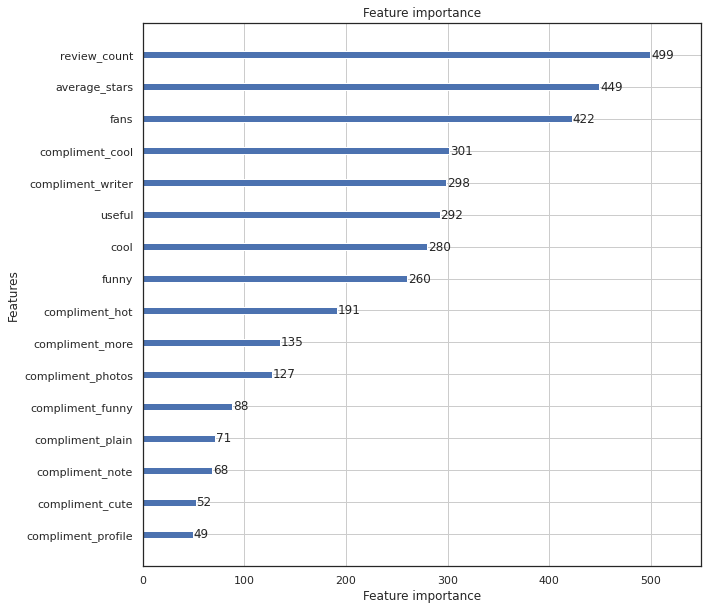

In [133]:
print('Plotting feature importances of LightGBM')
ax = lgb.plot_importance(lgb_gbm, max_num_features=18)
plt.show()

Feature Importance in XGBoost

Plotting feature importance XGBoost


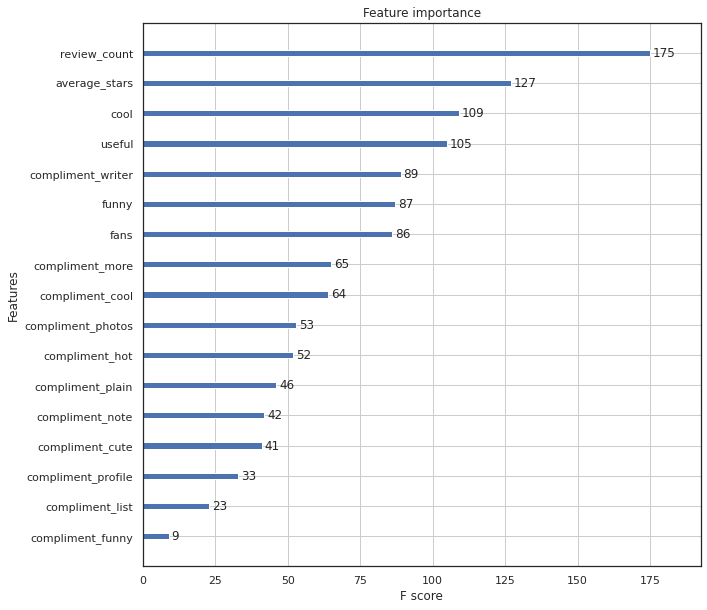

In [134]:
print('Plotting feature importance XGBoost')
ax = xgb.plot_importance(bst, max_num_features=18)
plt.show()

Feature Importance in RandomForest

In [135]:
print(feature_imp_rf)

{'useful': 0.0416, 'review_count': 0.097, 'funny': 0.0091, 'fans': 0.13, 'cool': 0.2136, 'compliment_writer': 0.1124, 'compliment_profile': 0.0, 'compliment_plain': 0.0278, 'compliment_photos': 0.0024, 'compliment_note': 0.0077, 'compliment_more': 0.0005, 'compliment_list': 0.0, 'compliment_hot': 0.025, 'compliment_funny': 0.1936, 'compliment_cute': 0.0002, 'compliment_cool': 0.1344, 'average_stars': 0.0046}


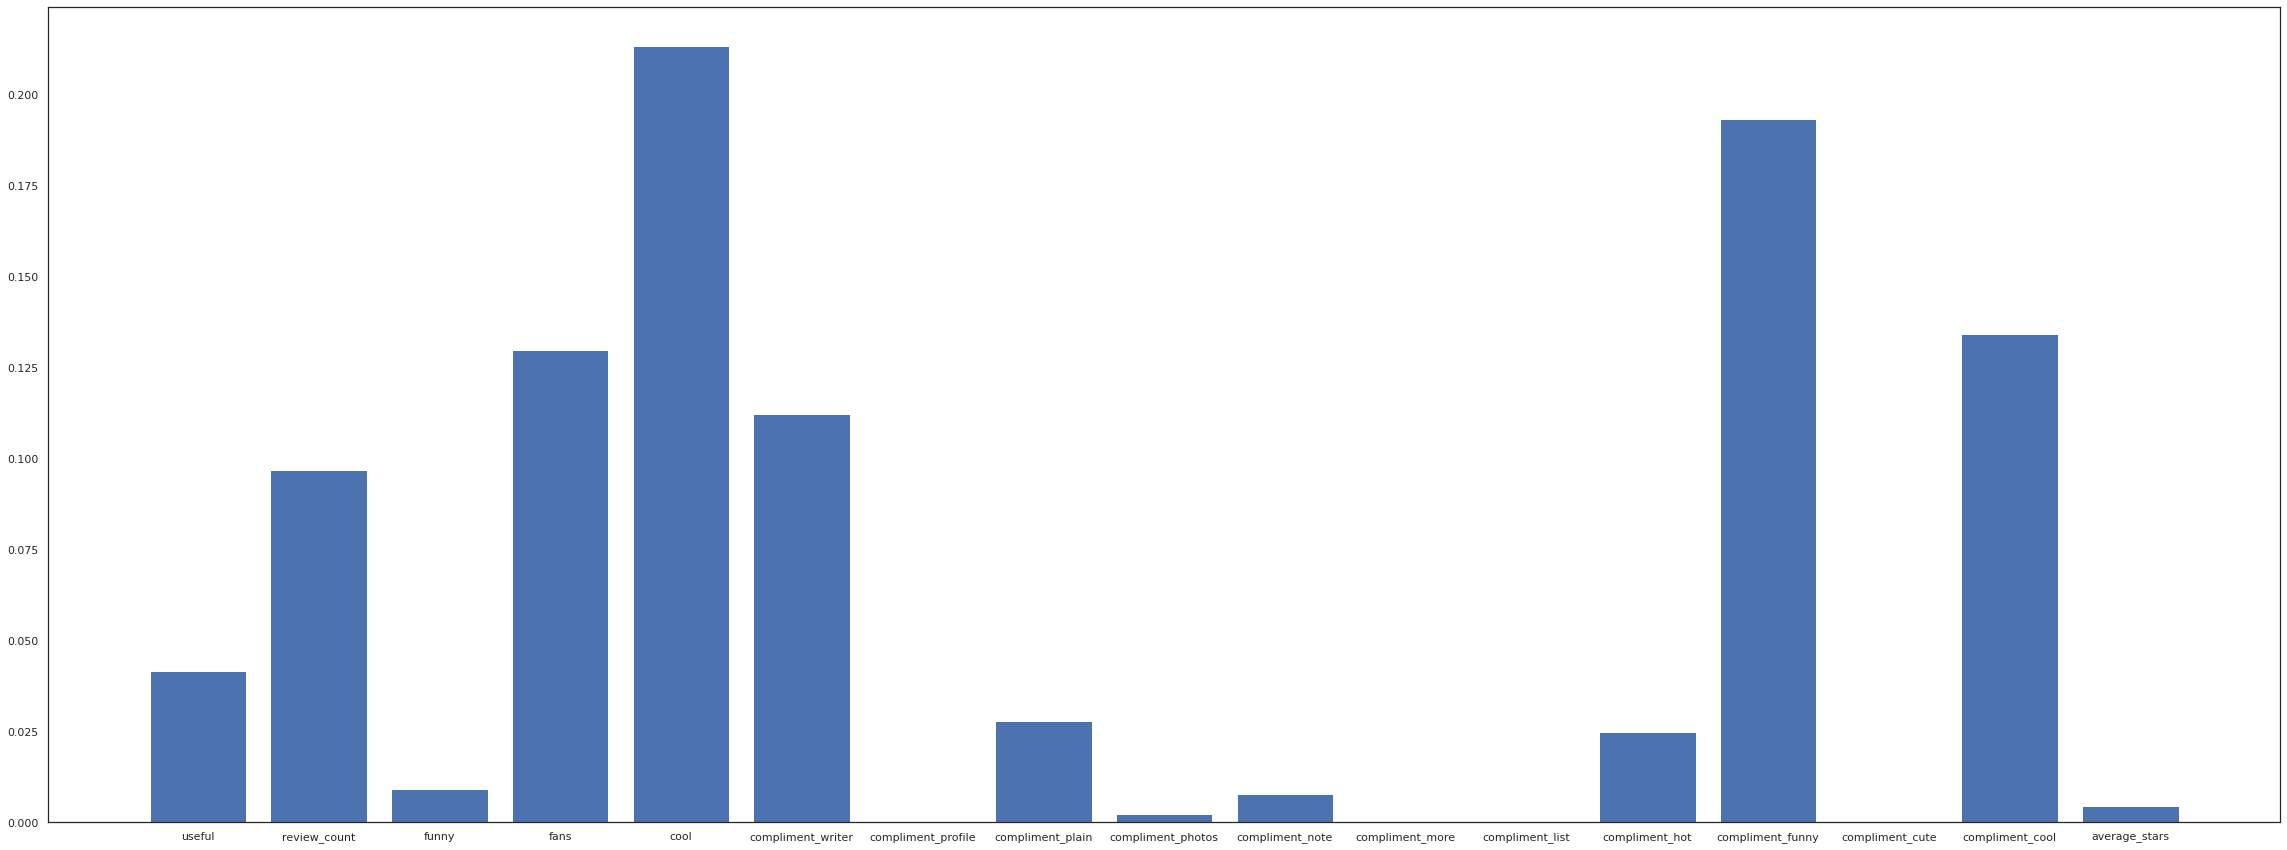

In [136]:
plt.figure(figsize=(40,15))
plt.bar(range(len(feature_imp_rf)), list(feature_imp_rf.values()), align='center')
plt.xticks(range(len(feature_imp_rf)), list(feature_imp_rf.keys()))
plt.show()

Let's examine the results of SHAP as well.

In [137]:
pip install shap

     |████████████████████████████████| 276kB 3.4MB/s 
  Created wheel for shap: filename=shap-0.35.0-cp36-cp36m-linux_x86_64.whl size=394130 sha256=fa183d3546b6222b14713c9db75453c226463fd757f41fe6ffbdab2452efb1fe
  Stored in directory: /root/.cache/pip/wheels/e7/f7/0f/b57055080cf8894906b3bd3616d2fc2bfd0b12d5161bcb24ac
Successfully built shap


In [0]:
import shap

In [139]:
lgb_gbm.params['objective'] = 'binary'
shap_values = shap.TreeExplainer(lgb_gbm).shap_values(x_val)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.
LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


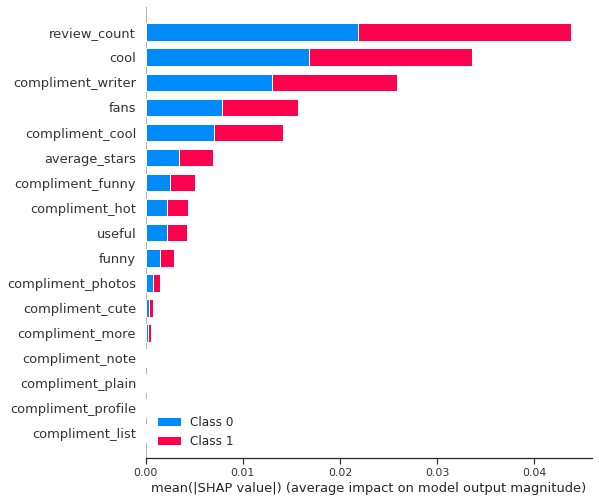

In [140]:
 shap.summary_plot(shap_values, x_val,show=False, max_display=x_val.shape[1])

Top 5 Features in each models:


> 

*   LightGBM: review_count, average_stars, fans, compliment_cool, compliment_writer
*   XGBoost: review_count, average_stars, cool, useful, compliment_writer
*  Random_Forest: useful, review_count, funny, fans, cool
* SHAP(with lightGBM): review_count, cool, compliment_writer, fans, compliment_cool





Proceeding to next step with LightGBM as it has the highest AUC.

> Step 1: Creating a dictionary of feature importances of LightGBM.



In [141]:
importances= lgb_gbm.feature_importance(importance_type='split')
print(importances)

[499 292 260 280 422 449 191 135  49  52   0  68  71 301  88 298 127]


In [142]:
#Scaling importances
imp_scaled = np.interp(importances, (importances.min(), importances.max()), (0, 1))
print(imp_scaled)

[1.         0.58517034 0.52104208 0.56112224 0.84569138 0.8997996
 0.38276553 0.27054108 0.09819639 0.10420842 0.         0.13627255
 0.14228457 0.60320641 0.17635271 0.59719439 0.25450902]


In [143]:
features = lgb_gbm.feature_name()
print(features)

['review_count', 'useful', 'funny', 'cool', 'fans', 'average_stars', 'compliment_hot', 'compliment_more', 'compliment_profile', 'compliment_cute', 'compliment_list', 'compliment_note', 'compliment_plain', 'compliment_cool', 'compliment_funny', 'compliment_writer', 'compliment_photos']


In [144]:
feature_imp_lgbm = dict(zip(features,imp_scaled))
print(feature_imp_lgbm)

{'review_count': 1.0, 'useful': 0.5851703406813626, 'funny': 0.5210420841683366, 'cool': 0.561122244488978, 'fans': 0.845691382765531, 'average_stars': 0.8997995991983967, 'compliment_hot': 0.38276553106212424, 'compliment_more': 0.27054108216432865, 'compliment_profile': 0.09819639278557113, 'compliment_cute': 0.10420841683366733, 'compliment_list': 0.0, 'compliment_note': 0.13627254509018036, 'compliment_plain': 0.14228456913827653, 'compliment_cool': 0.6032064128256512, 'compliment_funny': 0.17635270541082163, 'compliment_writer': 0.597194388777555, 'compliment_photos': 0.2545090180360721}




> Step 2: Generating a score from the feature importances



In [0]:
def getEliteScore(x):
  sum = 0
  for key, value in feature_imp_lgbm.items():
    sum = sum + (x[key]*value)
  return sum 

In [146]:
#To track the progress
from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`


In [0]:
df_score = df.copy()

In [148]:
df_score['score']= df_score.progress_apply(lambda x : getEliteScore(x),axis=1)


> Analyzing the score patterns between Elite and Non-Elite users



In [149]:
df_score.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,yelp_years,elite_User,number_of_Friends,score
0,ntlvfPzc8eglqvk92iDIAw,Rafael,553,2007-07-06 03:27:11,628,225,227,,"oeMvJh94PiGQnx_6GlndPQ, wm1z1PaJKvHgSDRKfwhfDg...",14,3.57000,3,2,1,0,1,11,15,22,22,10,0,13,0,1078,1208.69124
1,FOBRPlBHa3WPHFB5qYDlVg,Michelle,564,2008-04-28 01:29:25,790,316,400,"2008,2009,2010,2011,2012,2013","ly7EnE8leJmyqyePVYFlug, pRlR63iDytsnnniPb3AOug...",27,3.84000,36,4,5,2,1,33,37,63,63,21,5,12,1,5110,1529.92016
2,zZUnPeh2hEp0WydbAZEOOg,Martin,60,2008-08-28 23:40:05,151,125,103,2010,"Uwlk0txjQBPw_JhHsQnyeg, Ybxr1tSCkv3lYA0I1qmnPQ...",5,3.44000,9,6,0,1,0,3,7,17,17,4,1,12,1,838,301.08329
3,QaELAmRcDc5TfJEylaaP8g,John,206,2008-09-20 00:08:14,233,160,84,2009,"iog3Nyg1i4jeumiTVG_BSA, M92xWY2Vr9w0xoH8bPplfQ...",6,3.08000,2,1,0,0,0,7,14,7,7,2,0,12,1,4150,491.32449
4,xvu8G900tezTzbbfqmTKvA,Anne,485,2008-08-09 00:30:27,1265,400,512,"2009,2010,2011,2012,2014,2015,2016,2017,2018","3W3ZMSthojCUirKEqAwGNw, eTIbuu23j9tOgmIa9POyLQ...",78,4.37000,8,9,2,1,1,22,28,31,31,19,31,12,1,21478,1847.03032


In [150]:
pd.set_option('display.float_format', lambda x: '%.6f' % x)
#dataframe of elite users
eliteUsers = df_score[df_score['elite_User']==1]
print (eliteUsers['score'].describe())

count    75961.000000
mean      1196.687065
std       4356.162594
min          7.515792
25%        229.076733
50%        431.060421
75%        930.242685
max     350086.828317
Name: score, dtype: float64


In [151]:
#dataframe of non-elite users
normUsers = df_score[df_score['elite_User']==0]
print (normUsers['score'].describe())

count   1892742.000000
mean         30.636932
std         175.037216
min           0.899800
25%           6.344689
50%          10.884108
75%          26.506874
max      144150.080621
Name: score, dtype: float64


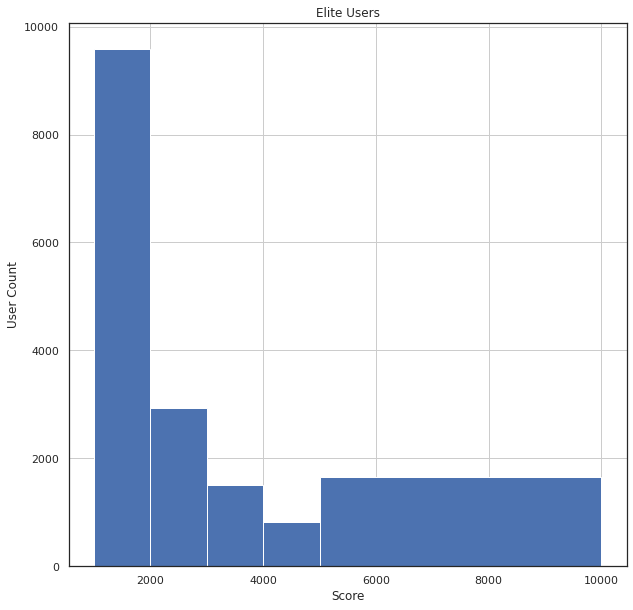

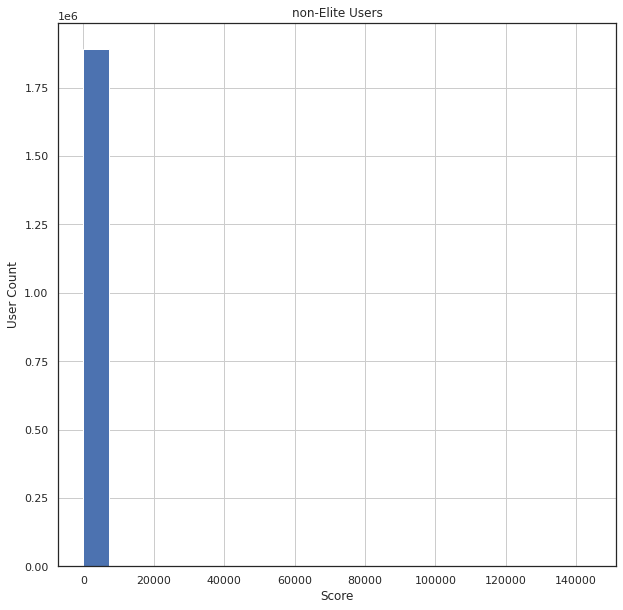

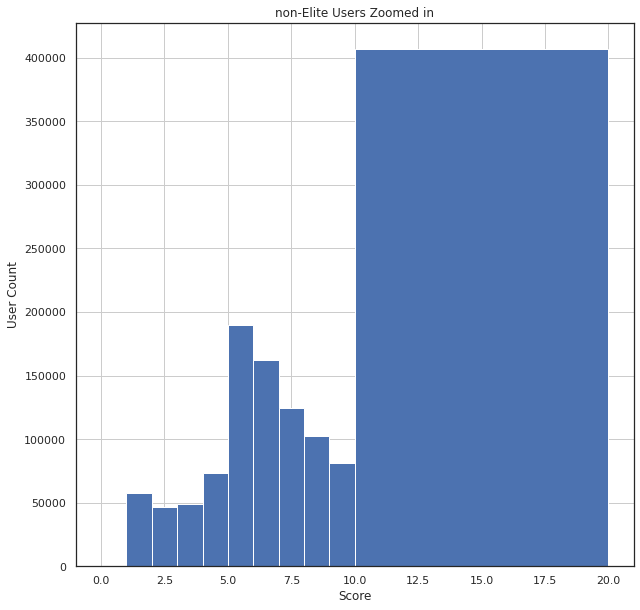

In [152]:
#Create uneven bins to help visualize histogram
bins = [0,1,2,3,4,5,10,20,30,50,100,200,300,400,500,1000]
bins1= [1000,2000,3000,4000,5000,10000]
#smaller scale for normal users
bins2 = [0,1,2,3,4,5,6,7,8,9,10,20]

plt.figure()
plt.title('Elite Users')
plt.xlabel("Score")
plt.ylabel("User Count")
eliteUsers['score'].hist(bins=bins1)
           
plt.figure()
plt.title('non-Elite Users')
plt.xlabel("Score")
plt.ylabel("User Count")
normUsers['score'].hist(bins=20)

plt.figure()
plt.title('non-Elite Users Zoomed in')
plt.xlabel("Score")
plt.ylabel("User Count")
normUsers['score'].hist(bins=bins2)



> Examining the distribution of elite users and trying to generate a normal curve distribution of their scores.



In [153]:
eliteScores = eliteUsers[['score']]

#print eliteScores
print(eliteScores['score'].mean())
print(eliteScores['score'].median())
print(eliteScores['score'].max())
print (eliteScores['score'].min())
std = eliteScores['score'].std()
print('Std. Deviation: ',std)
print ('Outlier Cuttoff: ',std*3)
eliteScores['score'] = eliteScores['score'].clip(0,3*std)

1196.6870652472583
431.06042084168337
350086.8283166333
7.515791583166331
Std. Deviation:  4356.162593559856
Outlier Cuttoff:  13068.487780679567



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [154]:
#Standardize scores to [0,1]
eliteScores['stdScore'] = eliteScores['score'].apply(lambda x : ( x - eliteScores['score'].min() ) / ( eliteScores['score'].max()-eliteScores['score'].min()))
#normalize scores. potentially creates negative values.
eliteScores['normScore'] = eliteScores['score'].apply(lambda x : ( x - eliteScores['score'].mean() ) / ( eliteScores['score'].max()-eliteScores['score'].min()))


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


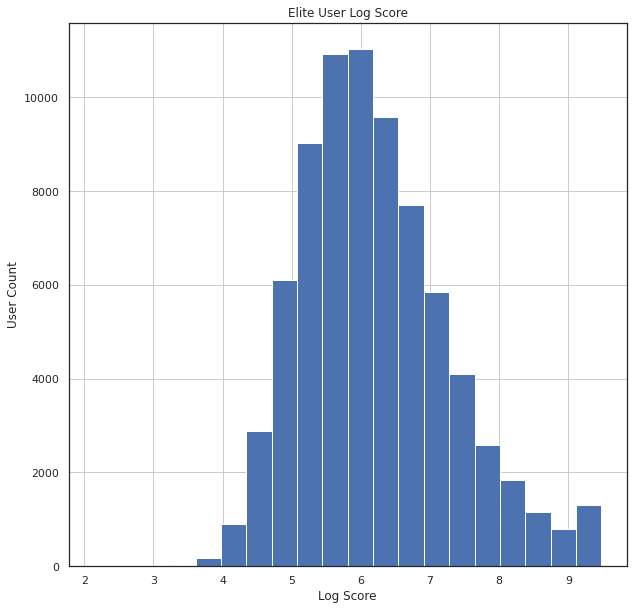

In [155]:
#Log-of Score
#the log function adds 1 to the score before taking the log because log(0) = undefined
def adjLog(x):
    return np.log(x+1)

eliteScores['logScore'] =  eliteScores['score'].apply(adjLog)

plt.figure()
plt.title('Elite User Log Score')
plt.xlabel("Log Score")
plt.ylabel("User Count")           
eliteScores['logScore'].hist(bins=20)

The log of the elite-user graph follows the normal curve distribution as shown above.

In [156]:
#Standardize log score
eliteScores['logstdScore'] = eliteScores['logScore'].apply(lambda x : ( x - eliteScores['logScore'].min() ) / ( eliteScores['logScore'].max()-eliteScores['logScore'].min()))


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




>  

*   Now using the above normal distribution we can apply CDF to find the proability of any given user. 
*   **In our case we will use this as a measure of eliteness/credibility**
* What is CDF? It is simply the probability upto a particular value of the random variable, say x. Generally denoted by F, F= P (X<=x) for any value of x in the X space.



In [0]:
import scipy.stats as stats
from scipy.stats import skewnorm
import matplotlib.mlab as mlab

In [0]:
#mu = mean, sigma = standard deviaition
mu, sigma =  stats.norm.fit(eliteScores['logstdScore'])
scoreDist = stats.norm(mu, sigma)

In [0]:
#Getting log of score before applying CDF
df_score['logScore'] = df_score['score'].apply(adjLog)

In [0]:
usermin = df_score['logScore'].min()
usermax = df_score['logScore'].max()
usermean = df_score['logScore'].mean()

In [0]:
#Standardizing the log score
df_score['logstdScore'] = df_score['logScore'].apply(lambda x : ( x - usermin ) / ( usermax-usermin))


In [162]:
#Generating our proability
df_score['customProbEliteUser'] = df_score['logstdScore'].progress_apply(scoreDist.cdf)

In [163]:
df_score.head(15)

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,yelp_years,elite_User,number_of_Friends,score,logScore,logstdScore,customProbEliteUser
0,ntlvfPzc8eglqvk92iDIAw,Rafael,553,2007-07-06 03:27:11,628,225,227,,"oeMvJh94PiGQnx_6GlndPQ, wm1z1PaJKvHgSDRKfwhfDg...",14,3.570000,3,2,1,0,1,11,15,22,22,10,0,13,0,1078,1208.691242,7.098120,0.532520,0.440263
1,FOBRPlBHa3WPHFB5qYDlVg,Michelle,564,2008-04-28 01:29:25,790,316,400,"2008,2009,2010,2011,2012,2013","ly7EnE8leJmyqyePVYFlug, pRlR63iDytsnnniPb3AOug...",27,3.840000,36,4,5,2,1,33,37,63,63,21,5,12,1,5110,1529.920160,7.333624,0.551944,0.492722
2,zZUnPeh2hEp0WydbAZEOOg,Martin,60,2008-08-28 23:40:05,151,125,103,2010,"Uwlk0txjQBPw_JhHsQnyeg, Ybxr1tSCkv3lYA0I1qmnPQ...",5,3.440000,9,6,0,1,0,3,7,17,17,4,1,12,1,838,301.083287,5.710703,0.418086,0.176628
3,QaELAmRcDc5TfJEylaaP8g,John,206,2008-09-20 00:08:14,233,160,84,2009,"iog3Nyg1i4jeumiTVG_BSA, M92xWY2Vr9w0xoH8bPplfQ...",6,3.080000,2,1,0,0,0,7,14,7,7,2,0,12,1,4150,491.324489,6.199138,0.458372,0.256426
4,xvu8G900tezTzbbfqmTKvA,Anne,485,2008-08-09 00:30:27,1265,400,512,"2009,2010,2011,2012,2014,2015,2016,2017,2018","3W3ZMSthojCUirKEqAwGNw, eTIbuu23j9tOgmIa9POyLQ...",78,4.370000,8,9,2,1,1,22,28,31,31,19,31,12,1,21478,1847.030321,7.521876,0.567471,0.534790
5,z5_82komKV3mI4ASGe2-FQ,Steve,186,2007-02-27 07:09:40,642,192,155,2007,"E-fXXmALnZTPmzzL6rV4cQ, L2g6vS1GDfqLEpiDOFfCkA...",15,2.880000,24,16,7,7,2,60,36,32,32,8,9,13,1,2158,824.214669,6.715644,0.500973,0.357640
6,ttumcu6hWshk_EJVWrduDg,Stuart,12,2010-05-12 16:30:08,29,4,6,,"1pKOc55fFx09J5t2rPzTxw, HYpE14yYEKSgu3VNVzObHA...",0,4.000000,0,0,0,0,0,2,3,0,0,0,1,10,0,1294,38.973948,3.688228,0.251273,0.019586
7,f4_MRNHvN-yRn7EA8YWRxg,Jennifer,822,2011-01-17 00:18:23,4127,2446,2878,"2011,2012,2013,2014,2015,2016,2017,2018","c-Dja5bexzEWBufNsHfRrQ, 02HJNyOzzYXvEKVApJb8GQ...",137,3.630000,483,81,62,35,24,193,541,623,623,293,172,9,1,18118,7269.723186,8.891611,0.680446,0.803833
8,UYACF30806j2mfbB5vdmJA,Justin,14,2007-07-24 23:55:21,68,21,34,,"YwaKGmRNnSa3R3N4Hf9jLw, v9YpDzYkJarRbzvVIY-63g...",4,3.750000,0,3,0,0,0,3,4,0,0,2,1,13,0,2038,93.807114,4.551844,0.322504,0.057269
9,QG13XBbgHWydzThRBGJtyw,Claire,218,2007-06-04 00:14:10,587,372,426,"2008,2009","tnfVwTpuPlR6W2xEAMiqsg, Bd_16T8Dva27lF5LIrUmcQ...",31,4.100000,39,5,1,5,3,18,24,37,37,17,5,13,1,8254,1087.302405,6.992374,0.523798,0.416991


#Examining the proabilities of the existing elite users.

In [0]:
eliteProbs = df_score[df_score.elite_User==1].customProbEliteUser



In [165]:
#Cut-off score for reliability
eliteProbs.mean()

0.2857265146333296

In [166]:
eliteProbs.median()

0.2334229175981909

In [167]:
eliteProbs.max()

0.9987687276418352

In [168]:
eliteProbs.min()

0.0016976982931143948

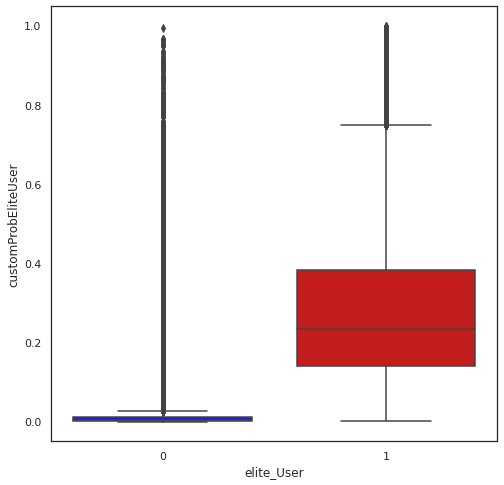

In [169]:
plt.figure(figsize=(8,8))
sns.boxplot(x="elite_User", y="customProbEliteUser", data=df_score, palette=colors)

#Validating our Probability score.

**After our analysis we can say that in the given user data or given a new user data, if the customer gets a proability score of above a certain mark, either be it the mean or median or any other measure,  then user might be realiable/credible customer whose has characteristics similar to that of an elite user.**

In [0]:
df_validation = df_score.copy()

In [171]:
df_validation.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,yelp_years,elite_User,number_of_Friends,score,logScore,logstdScore,customProbEliteUser
0,ntlvfPzc8eglqvk92iDIAw,Rafael,553,2007-07-06 03:27:11,628,225,227,,"oeMvJh94PiGQnx_6GlndPQ, wm1z1PaJKvHgSDRKfwhfDg...",14,3.570000,3,2,1,0,1,11,15,22,22,10,0,13,0,1078,1208.691242,7.098120,0.532520,0.440263
1,FOBRPlBHa3WPHFB5qYDlVg,Michelle,564,2008-04-28 01:29:25,790,316,400,"2008,2009,2010,2011,2012,2013","ly7EnE8leJmyqyePVYFlug, pRlR63iDytsnnniPb3AOug...",27,3.840000,36,4,5,2,1,33,37,63,63,21,5,12,1,5110,1529.920160,7.333624,0.551944,0.492722
2,zZUnPeh2hEp0WydbAZEOOg,Martin,60,2008-08-28 23:40:05,151,125,103,2010,"Uwlk0txjQBPw_JhHsQnyeg, Ybxr1tSCkv3lYA0I1qmnPQ...",5,3.440000,9,6,0,1,0,3,7,17,17,4,1,12,1,838,301.083287,5.710703,0.418086,0.176628
3,QaELAmRcDc5TfJEylaaP8g,John,206,2008-09-20 00:08:14,233,160,84,2009,"iog3Nyg1i4jeumiTVG_BSA, M92xWY2Vr9w0xoH8bPplfQ...",6,3.080000,2,1,0,0,0,7,14,7,7,2,0,12,1,4150,491.324489,6.199138,0.458372,0.256426
4,xvu8G900tezTzbbfqmTKvA,Anne,485,2008-08-09 00:30:27,1265,400,512,"2009,2010,2011,2012,2014,2015,2016,2017,2018","3W3ZMSthojCUirKEqAwGNw, eTIbuu23j9tOgmIa9POyLQ...",78,4.370000,8,9,2,1,1,22,28,31,31,19,31,12,1,21478,1847.030321,7.521876,0.567471,0.534790


Comparing our results with the original elite_user basing on mean.

In [0]:
#Mean of proability score elite users is 0.285
def ifEliteProb(x):
  if x>0.285:
    return 1
  else:
    return 0
df_validation['elite_Prob_Mean'] = df_validation['customProbEliteUser'].apply(ifEliteProb)

In [173]:
#Using pd.crosstab to validate
#confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
#Actual = elite_User, Predicted = elite_Prob_Mean

confusion_matrix_mean = pd.crosstab(df_validation['elite_User'], df_validation['elite_Prob_Mean'], rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix_mean)

Predicted        0      1
Actual                   
0          1888101   4641
1            45855  30106


In [174]:
from sklearn.metrics import classification_report
print(classification_report(df_validation['elite_User'], df_validation['elite_Prob_Mean']))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99   1892742
           1       0.87      0.40      0.54     75961

    accuracy                           0.97   1968703
   macro avg       0.92      0.70      0.77   1968703
weighted avg       0.97      0.97      0.97   1968703



Comparing our results with the original elite_user basing on median

In [0]:
#Median of proability score elite users is 0.233
def ifEliteProb_median(x):
  if x>0.233:
    return 1
  else:
    return 0
df_validation['elite_Prob_Median'] = df_validation['customProbEliteUser'].apply(ifEliteProb_median)

In [176]:
confusion_matrix_median = pd.crosstab(df_validation['elite_User'], df_validation['elite_Prob_Median'], rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix_median)

Predicted        0      1
Actual                   
0          1884400   8342
1            37914  38047


In [177]:
from sklearn.metrics import classification_report
print(classification_report(df_validation['elite_User'], df_validation['elite_Prob_Median']))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99   1892742
           1       0.82      0.50      0.62     75961

    accuracy                           0.98   1968703
   macro avg       0.90      0.75      0.80   1968703
weighted avg       0.97      0.98      0.97   1968703



In [0]:
df_comparision = df_validation[['elite_User','customProbEliteUser','elite_Prob_Mean','elite_Prob_Median']]

In [179]:
df_comparision.head(15)

,elite_User,customProbEliteUser,elite_Prob_Mean,elite_Prob_Median
0,0,0.440263,1,1
1,1,0.492722,1,1
2,1,0.176628,0,0
3,1,0.256426,0,1
4,1,0.534790,1,1
5,1,0.357640,1,1
6,0,0.019586,0,0
7,1,0.803833,1,1
8,0,0.057269,0,0
9,1,0.416991,1,1
